In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import kaepora as kpora
import kaepora_plot as kplot
import matplotlib.pyplot as plt
import copy
import numpy as np

In [43]:
example_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))"]

ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
167 Total Spectra found
167 spectra of SNe that have host reddening corrections
sn2005lz-20051227.29-fast.flm


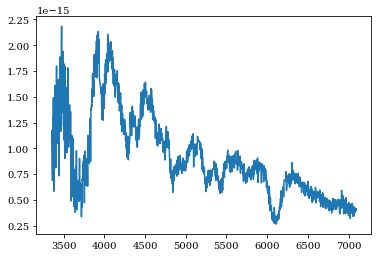

[nan nan nan ... nan nan nan]


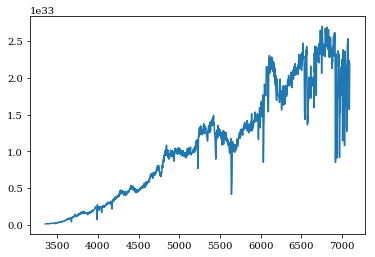

TypeError: 

In [67]:
spec_array = kpora.grab(example_query[0], verbose=True, db_file = '../data/kaepora_v1_DEV.db')
copy_array = copy.deepcopy(spec_array)

sn2006gr-20060928.18-fast.flm


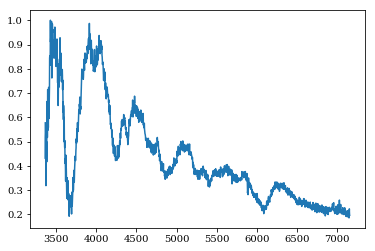

sn2006gr-20060929.13-fast.flm


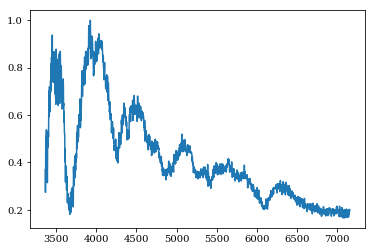

In [46]:
for spec in spec_array:
    if spec.name == '2006gr':
        print spec.filename
        plt.plot(spec.wavelength,spec.flux)
        plt.show()

In [5]:
print spec_array[0].event_data.keys()

[u'e_mb_lc', u'salt2_phot_source', u'e_c_salt', u'logMst_lc', u'Foundation_vel', u'delta', u'cov_mb_s_lc', u'B_minus_V_cfa_err', u'NED_host', u'e_Bmag_salt', u'mu_mlcs31', u'glon_host', u'zCMB_mlcs31', u'Carbon_presence', u'e_av_mlcs31', u'e_logMst_lc', u'e_s_salt', u'av_mlcs17', u'RA', u'Dm15_from_fits', u'cov_s_c_lc', u'MJD_max', u'M_b_cfa_err', u'e_delta_mlcs17', u'cERR', u'Foundation_x1', u'e_c_lc', u'Av_25', u'Redshift', u'av_mlcs31', u't0', u'Bmag_salt2', u'czCMB_host', u'x1ERR', u'mtype_host', u'filt_host', u'x1_salt2', u'cz_host', u'mu_salt', u'Ebv_host', u'mb_lc', u'globalmass', u'MUMODEL', u'zCMB_mlcs17', u'DEC', u'Homogenized_Photometry', u'e_c_salt2', u'e_av_mlcs17', u'Foundation_z', u'MURES_NO_MSTEP_C', u'Foundation_c', u'delta_mlcs17', u'bias_lc', u'global_umg', u'localmass', u'e_delta_mlcs31', u'MURES_NO_MSTEP', u'e_zCMB_mlcs31', u'zCMB_salt2', u'separation', u'V_at_max', u'c', u'Bmag_salt', u't1_host', u'Foundation_mjd_max', u'MU', u'ypos_host', u'localssfr', u'glat_hos

In [6]:
spec_array_dered = kpora.host_dereddening(spec_array, verbose=False, cutoff=2.)

In [32]:
for spec in spec_array_dered:
    print spec.name, spec.filename, spec.source, spec.phase, spec.wavelength[spec.x1], spec.wavelength[spec.x2]

1994s sn1994s-19940616-uoi.flm bsnip 0.998840596273 3126.0 11080.0
1998dk sn1998dk-19980831-ui.flm bsnip -0.728371655089 3310.0 10016.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 0.496750833938 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 0.460351148368 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip -0.385339276873 3298.0 10350.0
2000cx sn2000cx-20000728-ui.flm bsnip 0.496974506501 3328.0 10316.0
2001cp sn2001cp-20010629-ui.flm bsnip 0.917447344588 3280.0 10122.0
2002de sn2002de-20020608.374-ui-corrected.flm bsnip -0.16048772706 3142.0 10064.0
2002ha sn2002ha-20021102-ui-corrected.flm bsnip -0.0433753943234 3110.0 10204.0
2002he sn2002he-20021108-br.flm bsnip 0.0575854705037 3050.0 9148.0
2005ag sn2005ag-20050212.596-br.flm bsnip -0.670578373849 3554.0 8516.0
2005eq sn2005eq-20051011.376-ui-corrected.flm bsnip 0.202142516304 3280.0 10154.0
2005lz sn2005lz-20060101.381-deimos.flm bsnip 0.451002115207 4774.0 9582.0
2005na sn2005na-20060105.335-ui.flm bsnip 0.

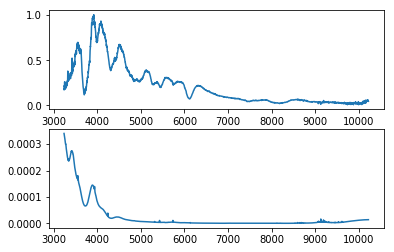

In [8]:
fig, ax = plt.subplots(2,1)
example_spec = spec_array_dered[20]
ax[0].plot(example_spec.wavelength, example_spec.flux)
ax[1].plot(example_spec.wavelength, 1/example_spec.ivar)
plt.show()

In [9]:
spec_attributes = dir(spec_array[0])
print len(spec_array)
for att in spec_attributes:
    print att

170
SNR
__class__
__delattr__
__dict__
__doc__
__format__
__getattribute__
__hash__
__init__
__module__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
av_25
av_mlcs17
av_mlcs31
c_array
dm15
dm15_array
event_data
filename
flux
hr_array
interp
ivar
low_conf
maxwave
minwave
mjd
morph_array
name
other_spectral_data
phase
phase_array
red_array
ref
shape_param
source
spec_bin
up_conf
vel
wavelength
x1
x2


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8)) and Spectra.SN != '2006gr'
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
165 Total Spectra found
4 flagged spectra removed 161 spectra left
5 spectra of peculiar Ias removed 156 spectra left
131 spectra of SNe that have host reddening corrections
Arrays cleaned
131 spectra may have telluric contamination
74 total SNe
removed spectra of SNe with A_V > 2.0
Using 127 spectra of 71 SNe


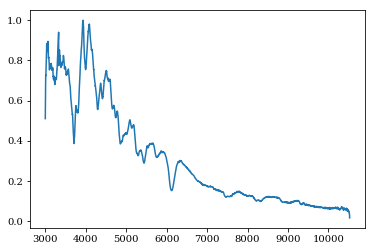

[5.14499559 5.14549475 5.14598947 ... 5.24962363 5.24962474 5.24962585]


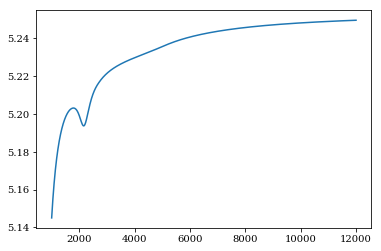

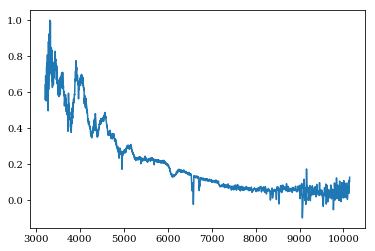

[1.03584341 1.03989268 1.0439211  ... 2.32759808 2.32761785 2.32763761]


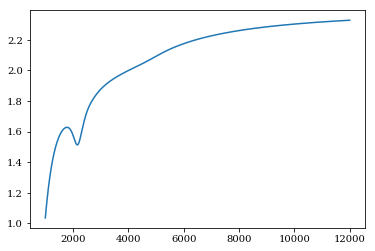

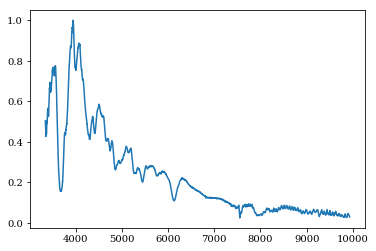

[0.38958956 0.39426433 0.39895235 ... 4.62984557 4.6299658  4.63008598]


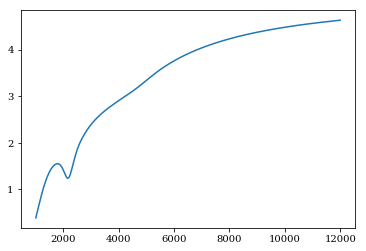

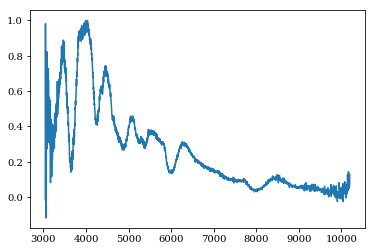

[0.03509627 0.03594485 0.03680603 ... 4.99314136 4.99340108 4.99366069]


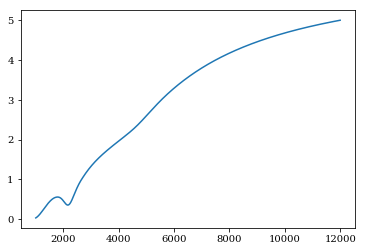

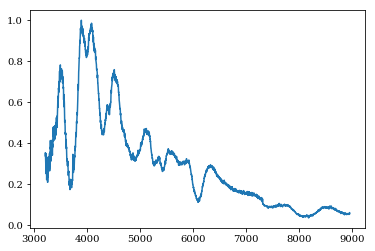

[0.27482418 0.27861851 0.28243036 ... 4.72939363 4.72953481 4.72967594]


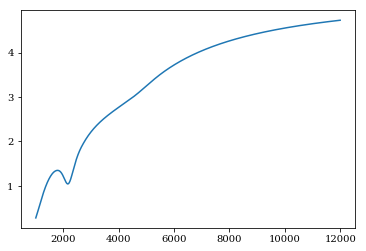

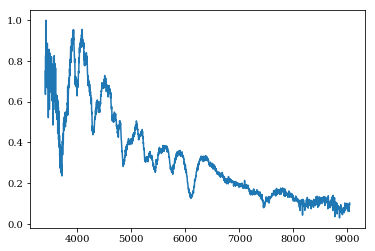

[2.20718162 2.20739956 2.20761556 ... 2.25287211 2.2528726  2.25287308]


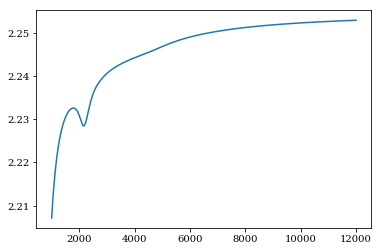

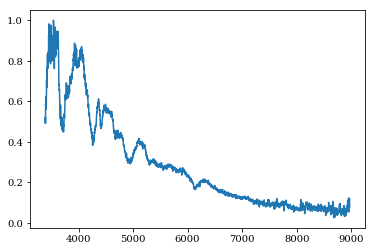

[0.34840232 0.35249332 0.35659487 ... 3.92777048 3.92787031 3.92797009]


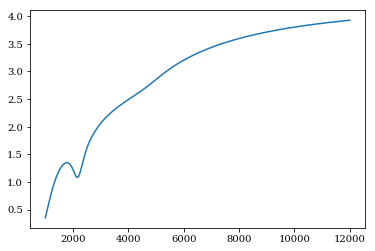

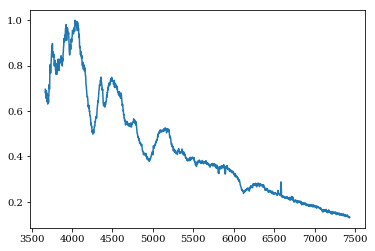

[0.02206755 0.02266101 0.02326488 ... 5.43740816 5.43772231 5.43803635]


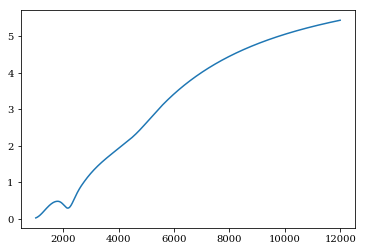

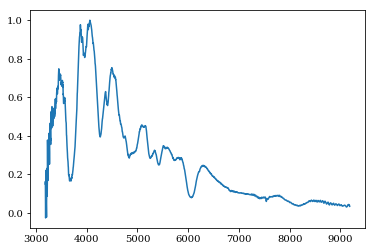

[0.02584713 0.02651904 0.02720213 ... 5.31192281 5.3122196  5.31251628]


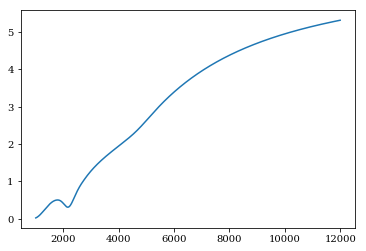

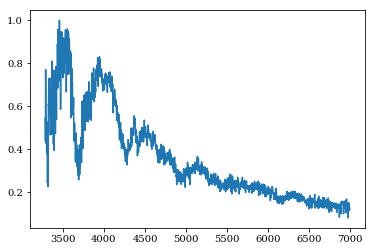

[0.24245561 0.2453417  0.24823569 ... 2.82535283 2.82542562 2.82549838]


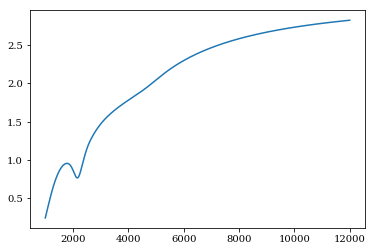

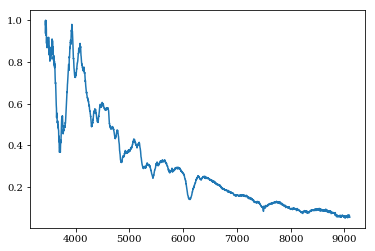

[3.03420962 3.03451622 3.03482008 ... 3.098501   3.09850168 3.09850237]


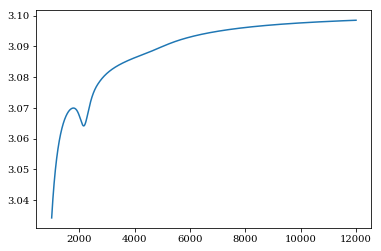

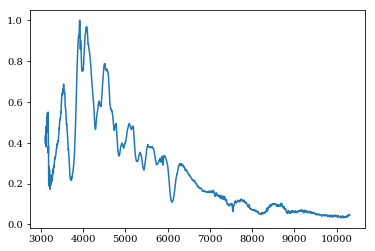

[0.06756852 0.0691291  0.07071118 ... 7.71887215 7.71925586 7.71963944]


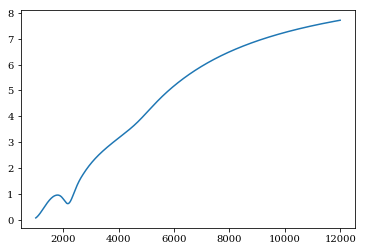

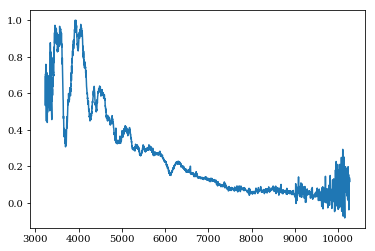

[0.06105483 0.06246238 0.06388927 ... 6.91516457 6.91550772 6.91585073]


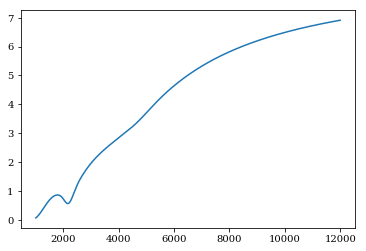

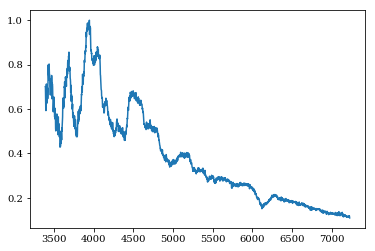

[0.89398969 0.89792956 0.90185109 ... 2.22655861 2.22657993 2.22660124]


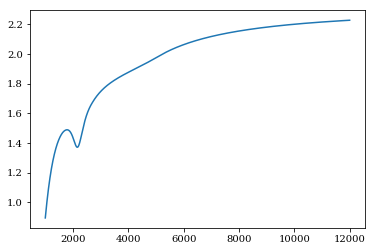

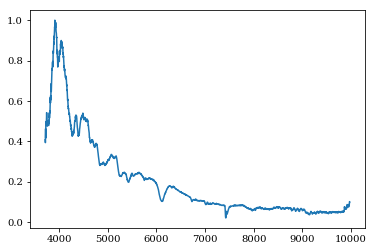

[0.34454352 0.34826192 0.35198643 ... 3.19634848 3.19642318 3.19649785]


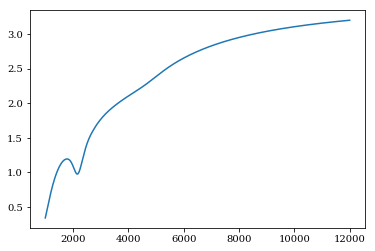

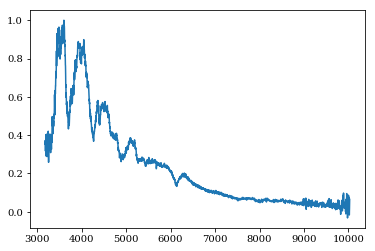

[0.7130671  0.71738121 0.72168222 ... 2.49306067 2.49309341 2.49312613]


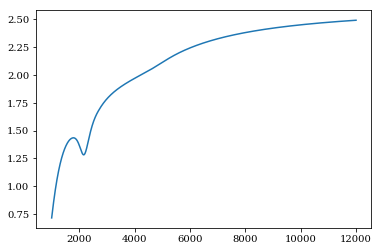

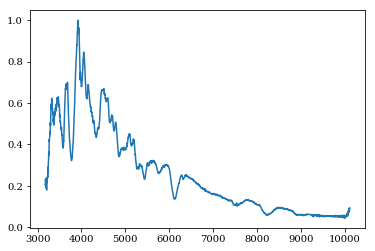

[3.68781815 3.70021365 3.71253864 ... 7.3991217  7.39917575 7.39922978]


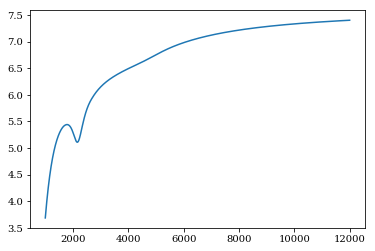

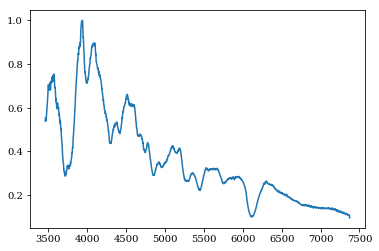

[0.03252084 0.03331601 0.03412319 ... 4.88915281 4.88940995 4.88966699]


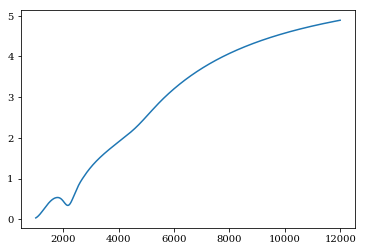

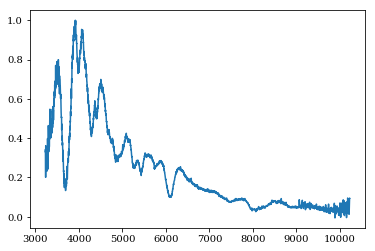

[0.06375999 0.06520486 0.06666902 ... 6.6684256  6.66875092 6.66907612]


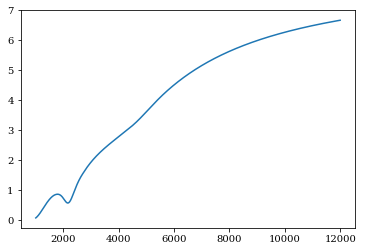

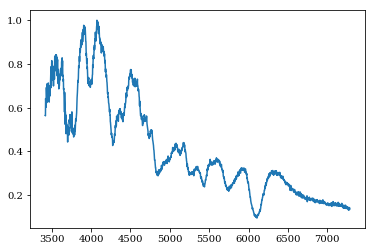

[0.44122322 0.44510061 0.44897669 ... 2.71128231 2.71133395 2.71138558]


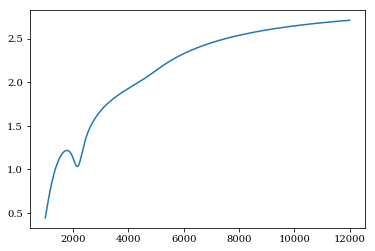

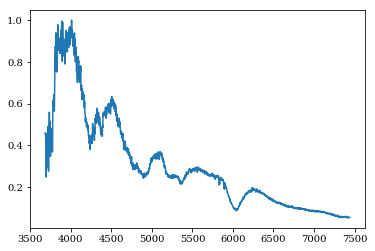

[2.24346101e-06 2.43264693e-06 2.63586440e-06 ... 4.43837536e+01
 4.43915773e+01 4.43993989e+01]


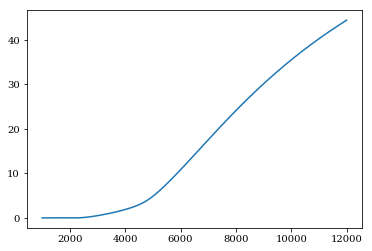

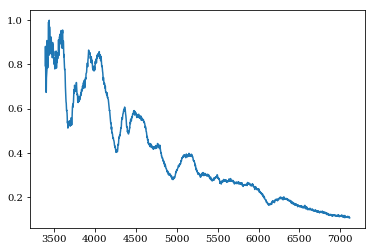

[2.00157069 2.00193353 2.00229316 ... 2.07829133 2.07829215 2.07829297]


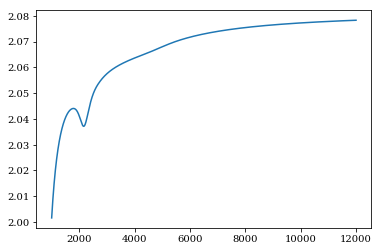

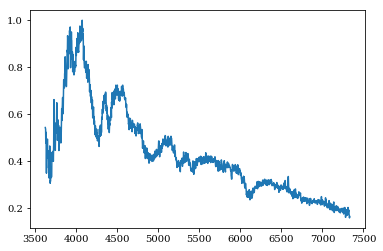

[0.00685123 0.0070806  0.00731547 ... 6.36042934 6.36088535 6.36134119]


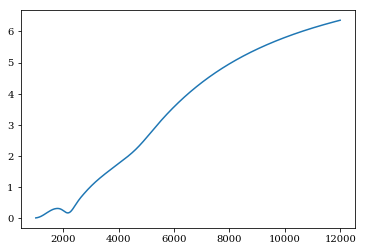

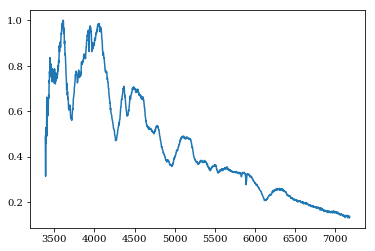

[0.09189989 0.09359735 0.09531047 ... 4.09974726 4.09991062 4.10007391]


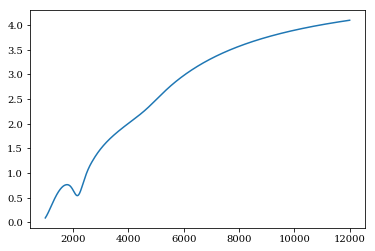

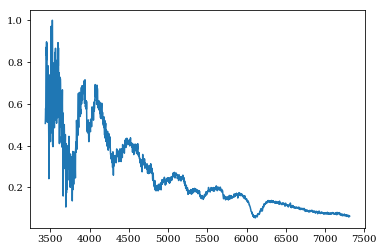

[1.37449655 1.37473324 1.37496784 ... 1.42449724 1.42449778 1.42449831]


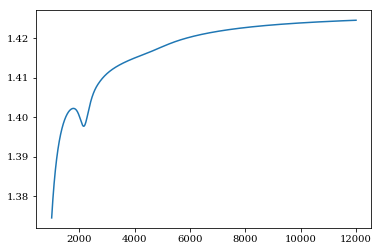

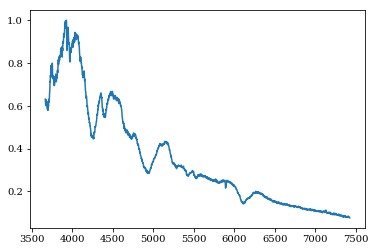

[0.0947241  0.09644922 0.09818981 ... 4.00874506 4.00890258 4.00906003]


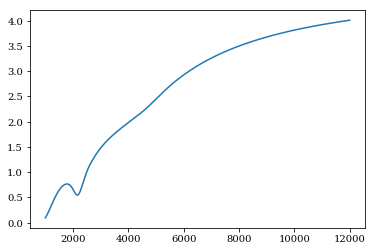

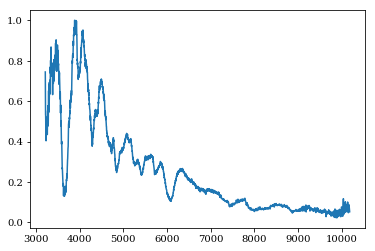

[0.12626167 0.12875726 0.13127905 ... 7.3313551  7.3316675  7.33197978]


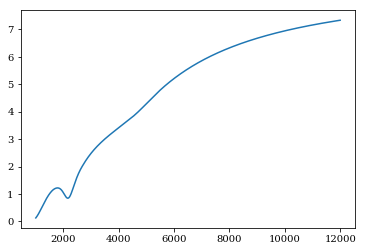

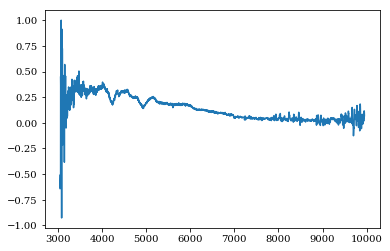

[0.24256469 0.24568855 0.24882397 ... 3.45185658 3.45195275 3.45204888]


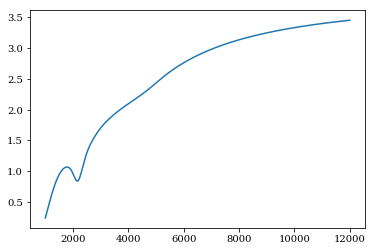

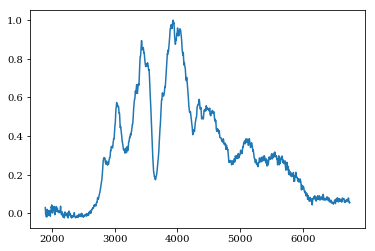

[0.93073072 0.93487184 0.93899385 ... 2.33839054 2.33841315 2.33843574]


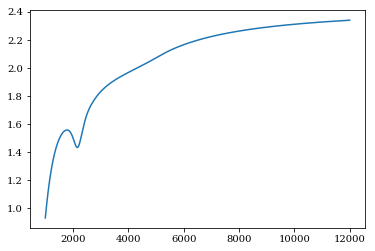

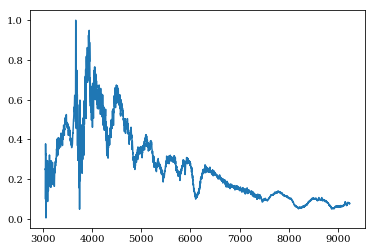

[3.36996718e-04 3.56585900e-04 3.77121877e-04 ... 4.16587065e+01
 4.16638312e+01 4.16689543e+01]


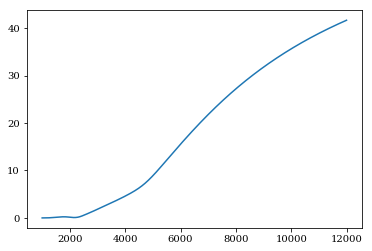

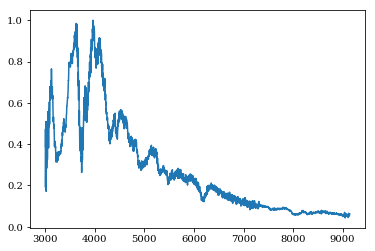

[1.04643724 1.05108045 1.05570218 ... 2.62249852 2.6225238  2.62254906]


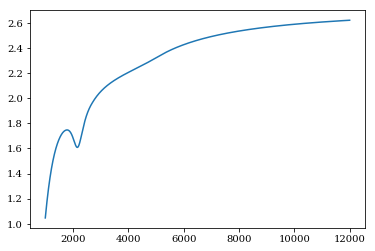

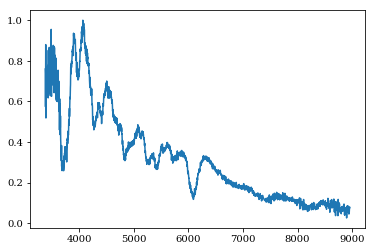

[1.91072559 1.9110587  1.91138886 ... 1.98110855 1.9811093  1.98111005]


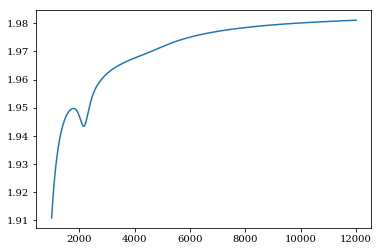

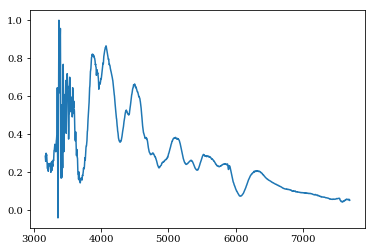

[4.31211300e-05 4.62869095e-05 4.96534251e-05 ... 1.04589929e+02
 1.04606062e+02 1.04622191e+02]


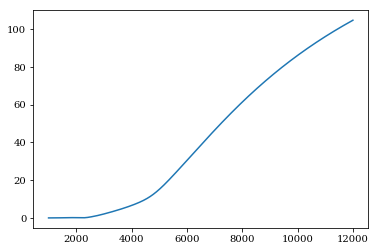

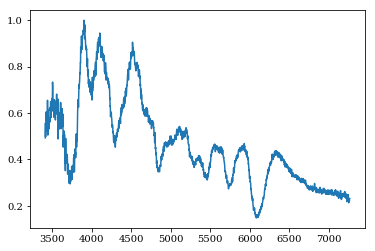

[1.91713798 1.91746791 1.91779492 ... 1.9868345  1.98683525 1.98683599]


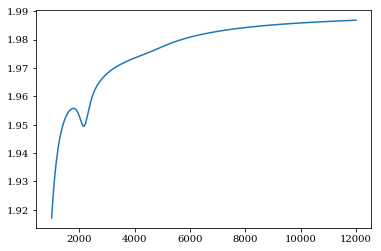

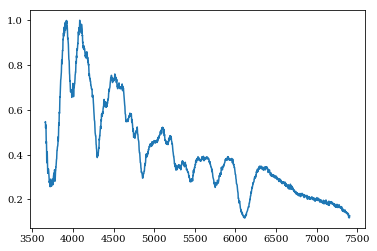

[1.97001173 1.97032209 1.9706297  ... 2.03547429 2.03547499 2.03547569]


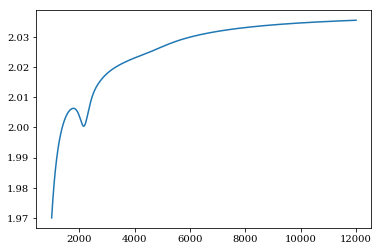

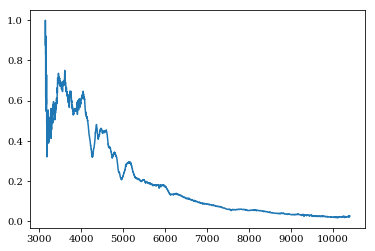

[0. 0. 0. ... 0. 0. 0.]


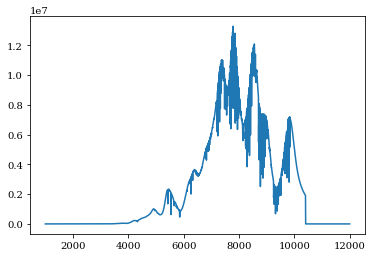

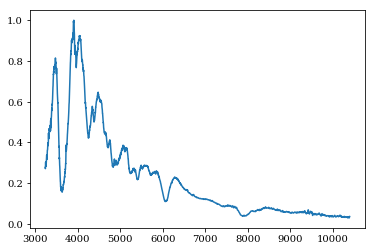

[0. 0. 0. ... 0. 0. 0.]


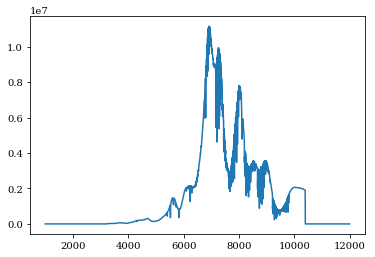

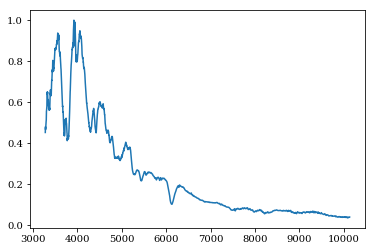

[0. 0. 0. ... 0. 0. 0.]


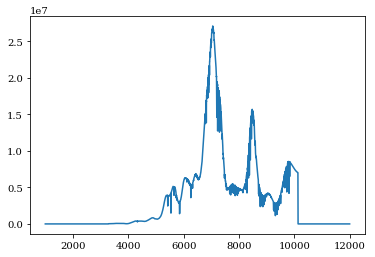

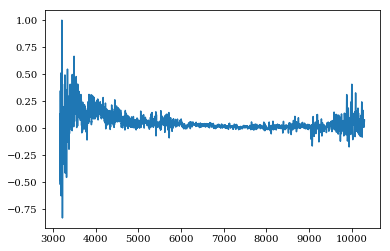

[0. 0. 0. ... 0. 0. 0.]


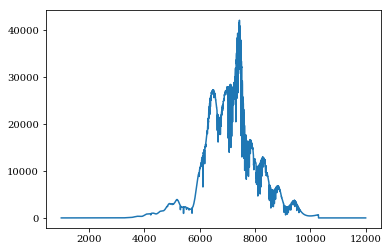

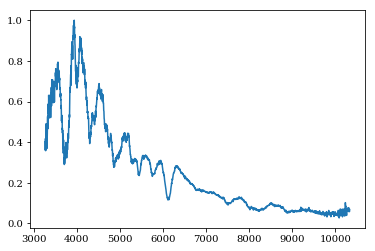

[0. 0. 0. ... 0. 0. 0.]


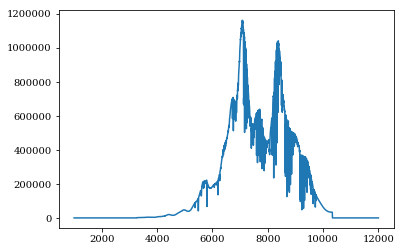

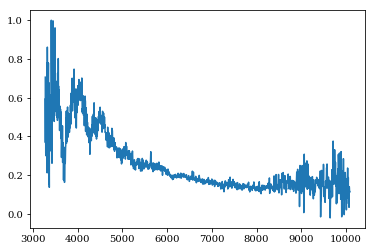

[0. 0. 0. ... 0. 0. 0.]


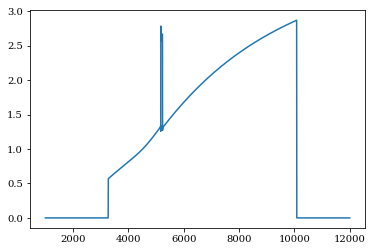

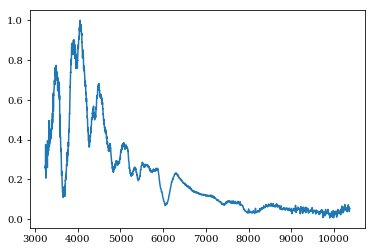

[0. 0. 0. ... 0. 0. 0.]


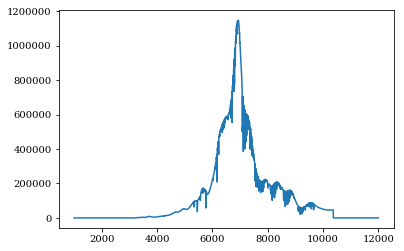

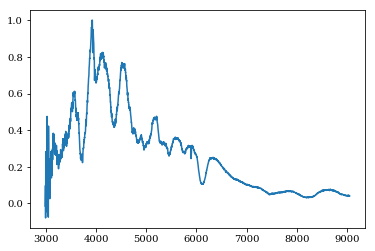

[0. 0. 0. ... 0. 0. 0.]


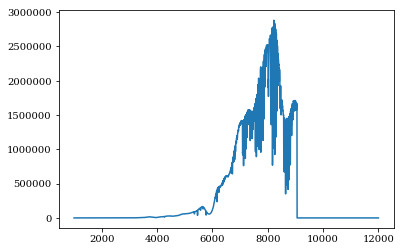

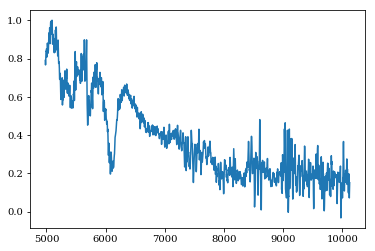

[0. 0. 0. ... 0. 0. 0.]


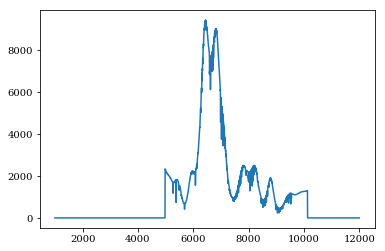

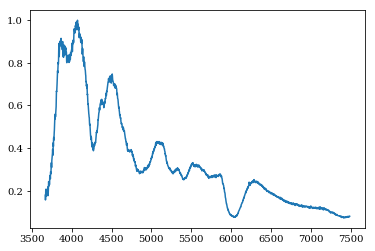

[0. 0. 0. ... 0. 0. 0.]


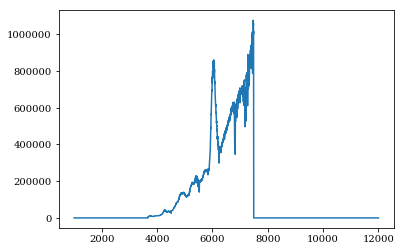

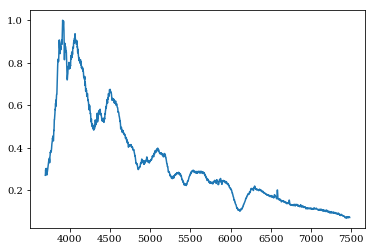

[0. 0. 0. ... 0. 0. 0.]


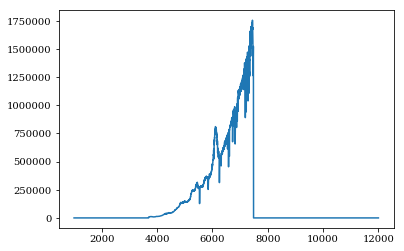

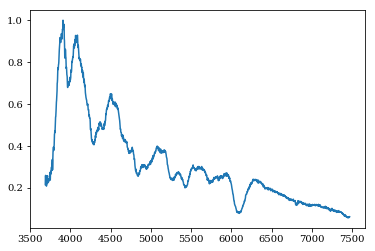

[0. 0. 0. ... 0. 0. 0.]


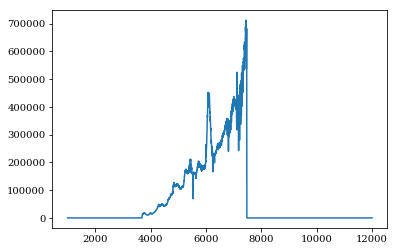

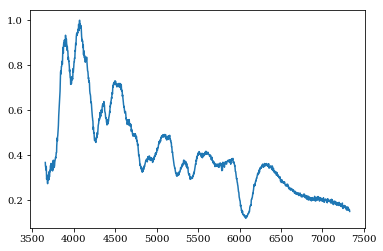

[0. 0. 0. ... 0. 0. 0.]


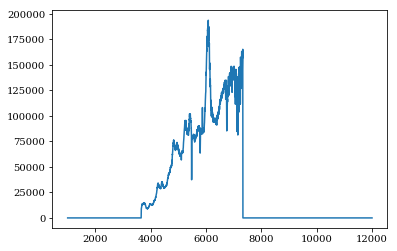

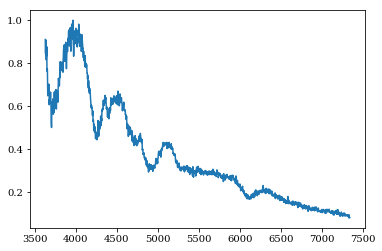

[0. 0. 0. ... 0. 0. 0.]


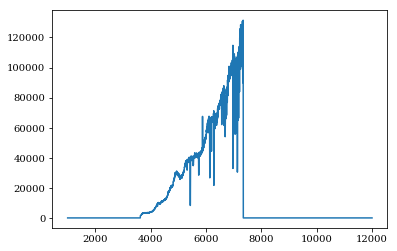

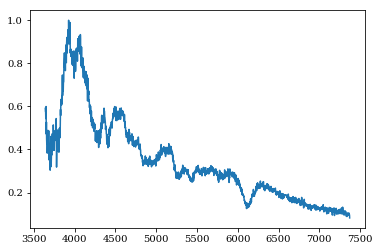

[0. 0. 0. ... 0. 0. 0.]


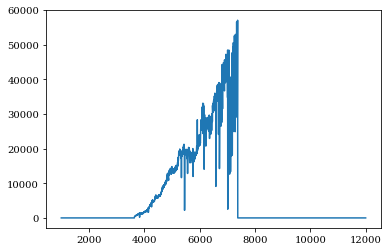

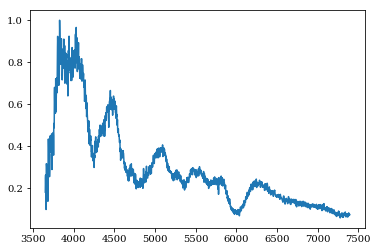

[0. 0. 0. ... 0. 0. 0.]


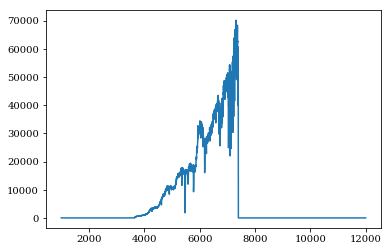

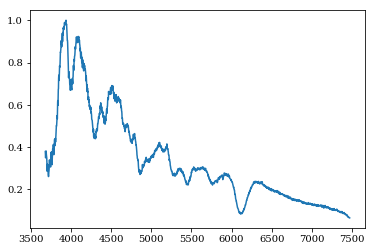

[0. 0. 0. ... 0. 0. 0.]


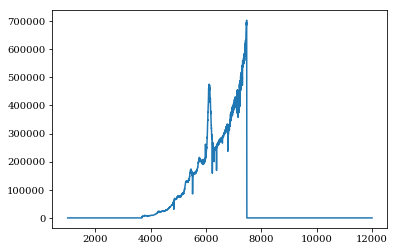

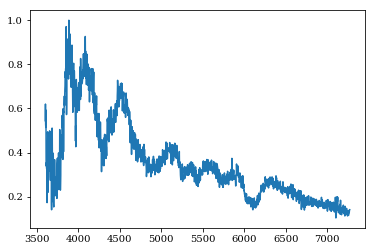

[0. 0. 0. ... 0. 0. 0.]


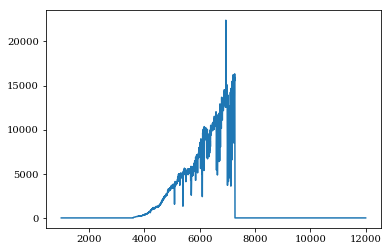

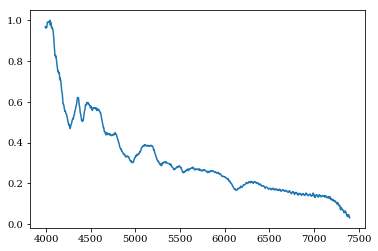

[0. 0. 0. ... 0. 0. 0.]


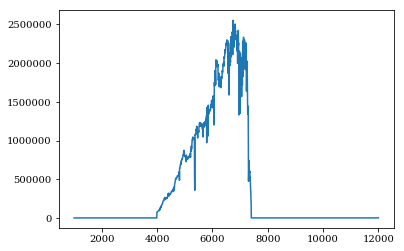

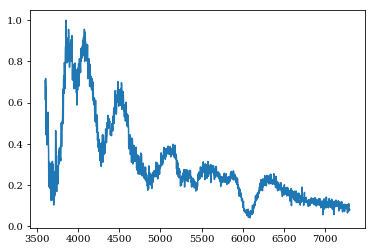

[0. 0. 0. ... 0. 0. 0.]


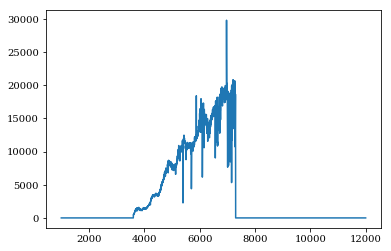

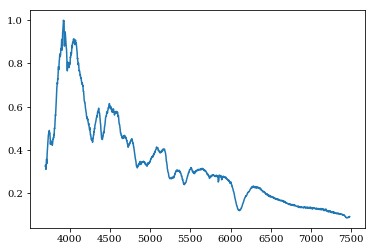

[0. 0. 0. ... 0. 0. 0.]


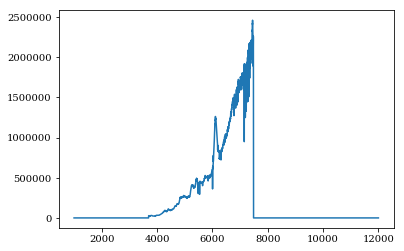

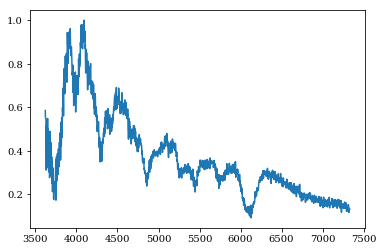

[0. 0. 0. ... 0. 0. 0.]


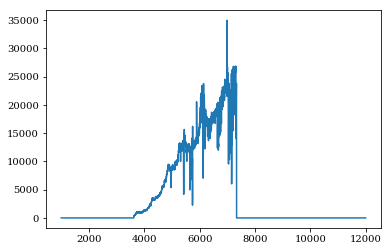

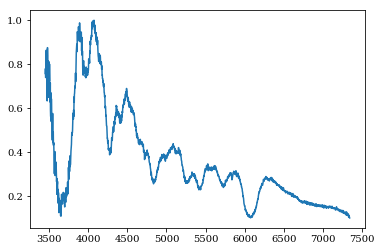

[0. 0. 0. ... 0. 0. 0.]


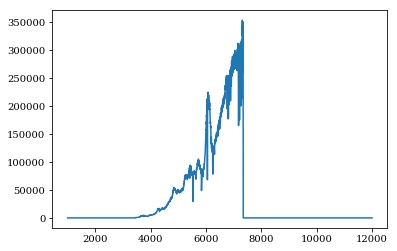

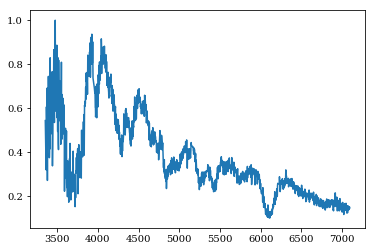

[0. 0. 0. ... 0. 0. 0.]


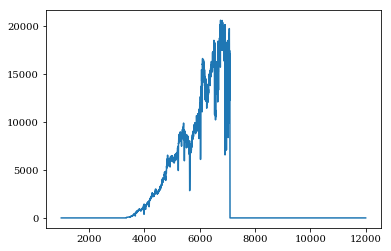

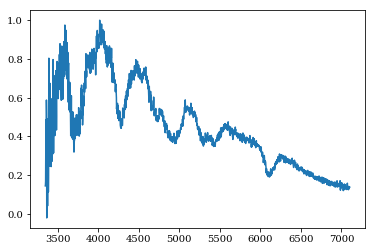

[0. 0. 0. ... 0. 0. 0.]


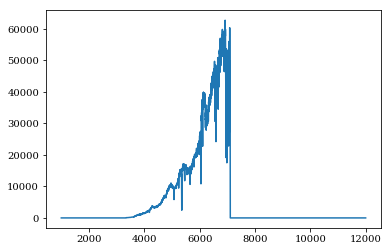

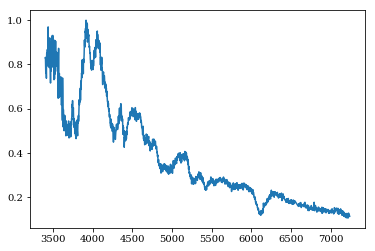

[0. 0. 0. ... 0. 0. 0.]


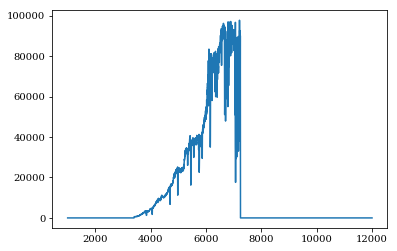

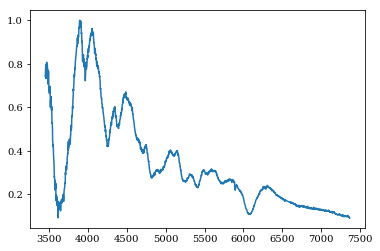

[0. 0. 0. ... 0. 0. 0.]


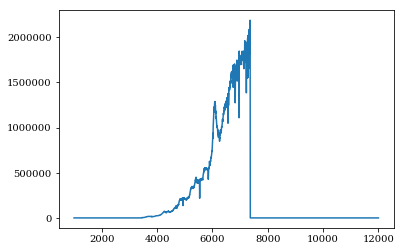

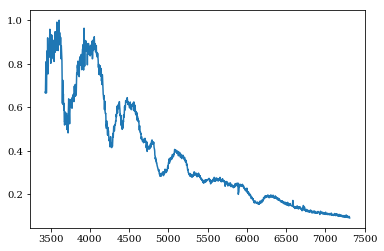

[0. 0. 0. ... 0. 0. 0.]


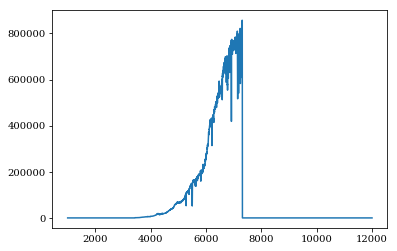

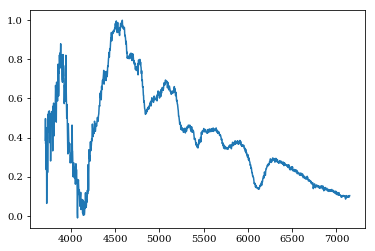

[0. 0. 0. ... 0. 0. 0.]


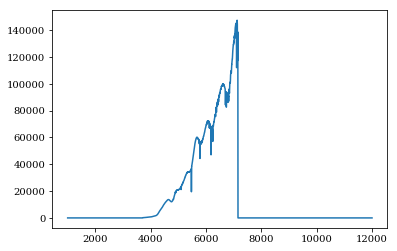

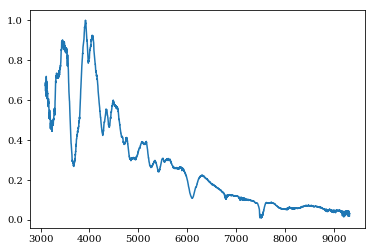

[0. 0. 0. ... 0. 0. 0.]


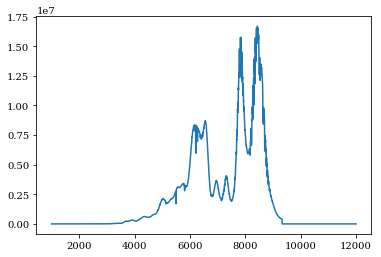

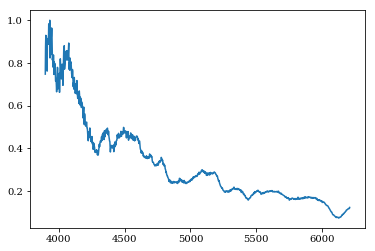

[0. 0. 0. ... 0. 0. 0.]


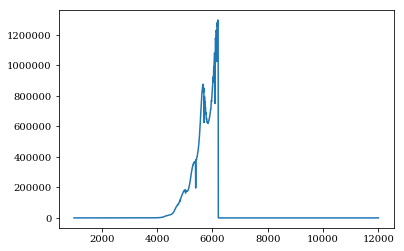

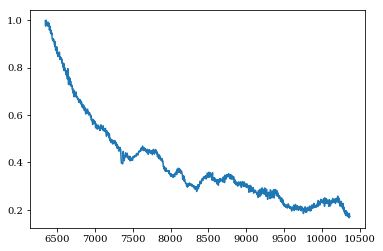

[0. 0. 0. ... 0. 0. 0.]


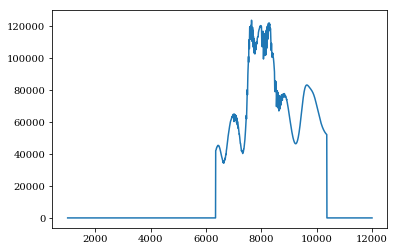

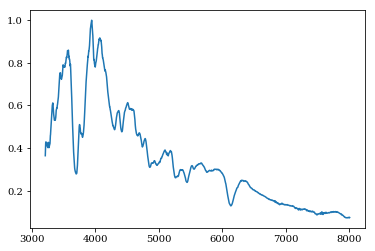

[0. 0. 0. ... 0. 0. 0.]


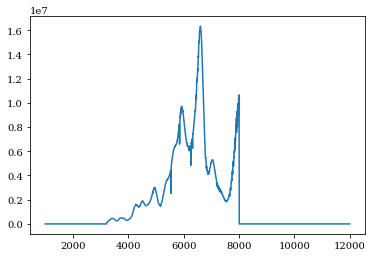

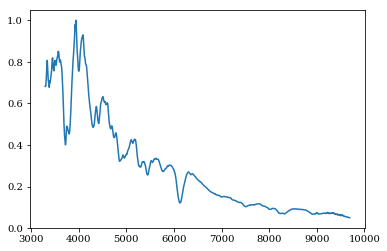

[0. 0. 0. ... 0. 0. 0.]


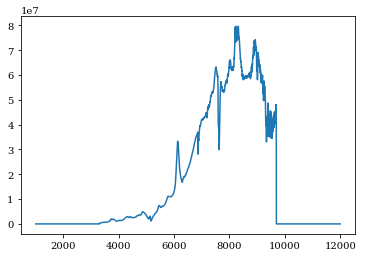

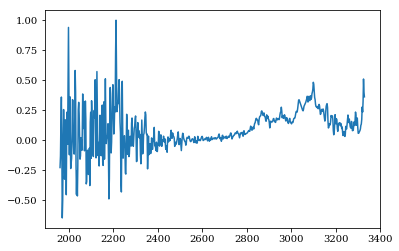

[0. 0. 0. ... 0. 0. 0.]


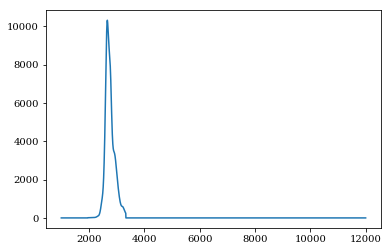

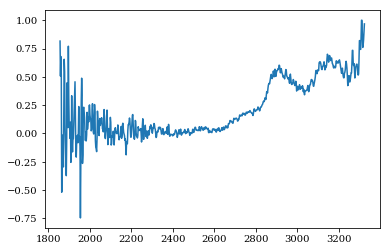

[0. 0. 0. ... 0. 0. 0.]


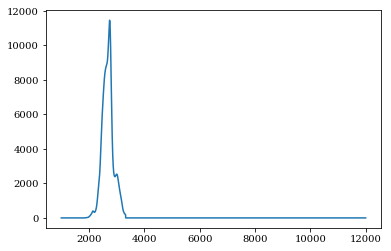

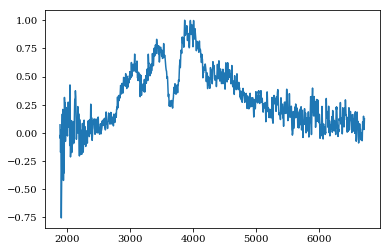

[0. 0. 0. ... 0. 0. 0.]


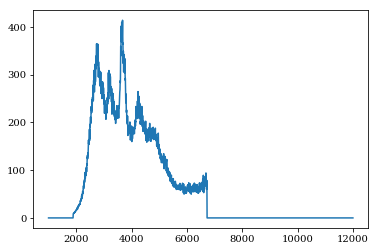

In [144]:
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8)) and Spectra.SN != '2006gr'"]
composites, sn_arrays, og_SN_Arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '../data/kaepora_v1_DEV.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=False, combine=True, scale_region=[4000,9000], get_og_arr = True)


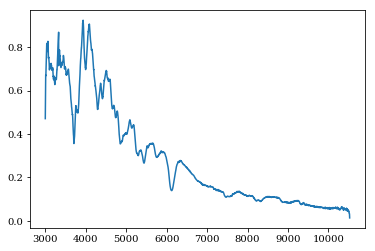

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


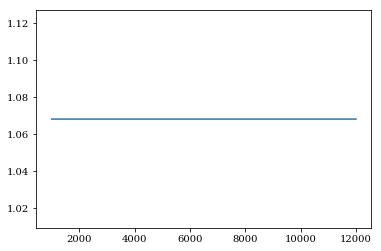

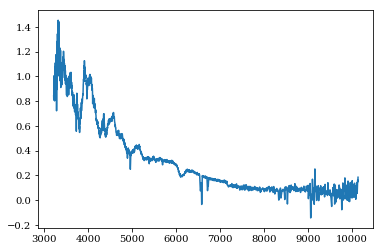

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


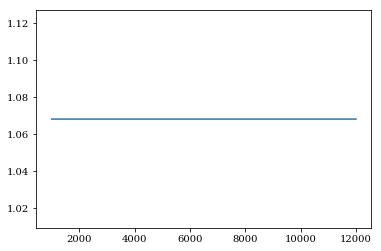

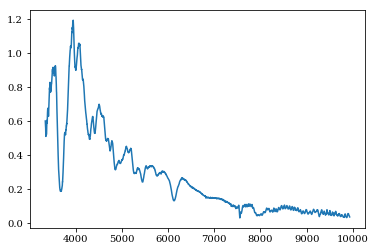

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


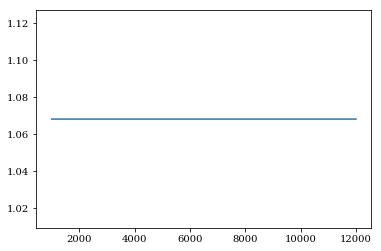

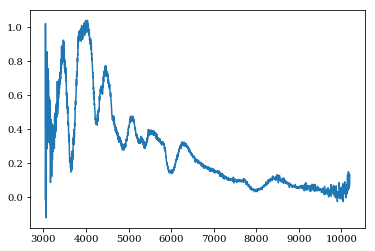

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


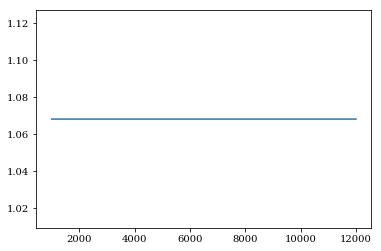

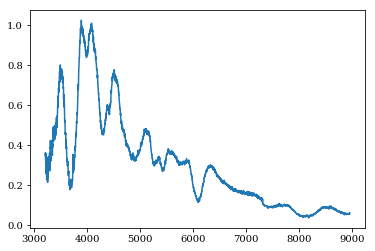

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


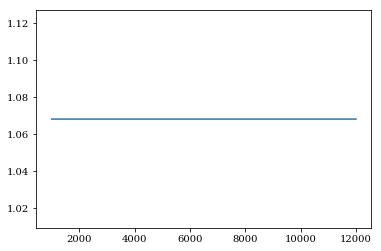

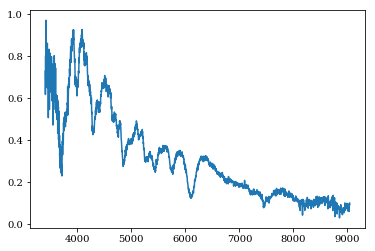

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


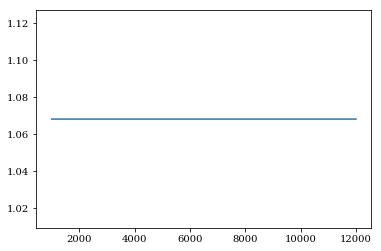

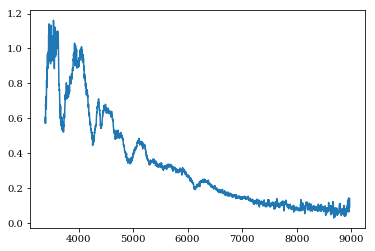

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


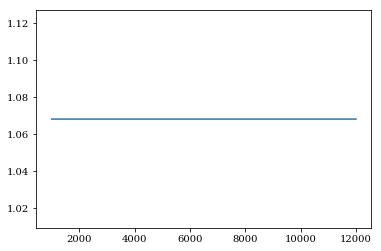

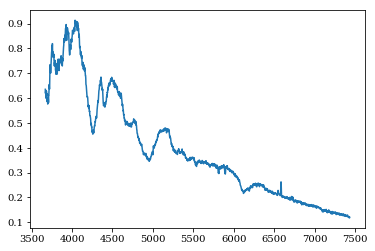

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


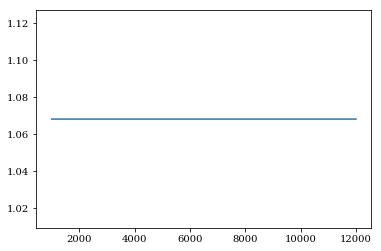

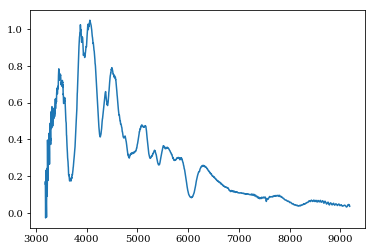

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


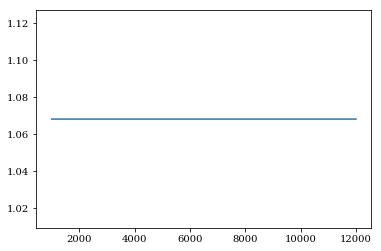

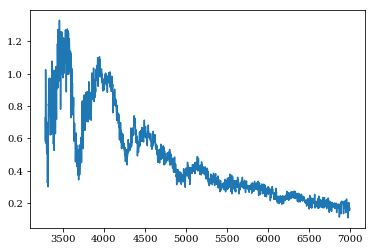

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


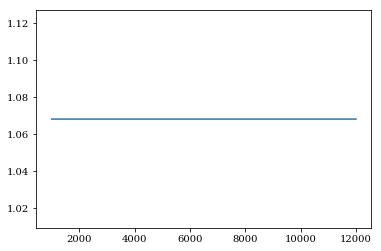

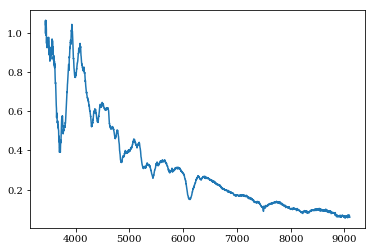

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


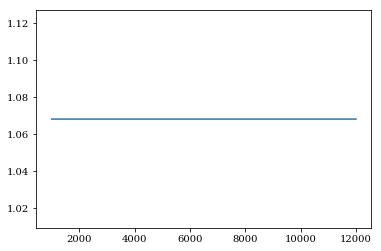

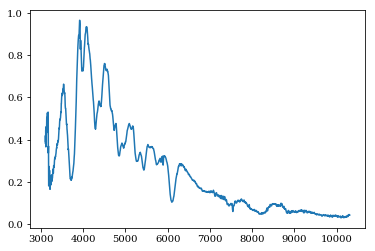

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


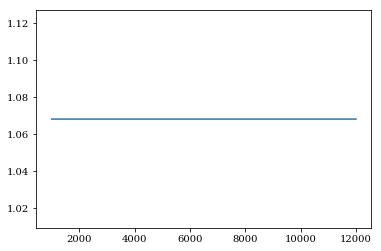

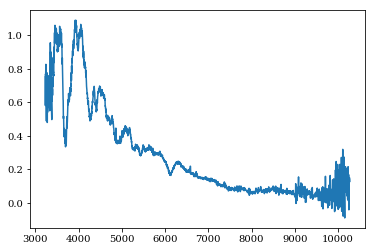

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


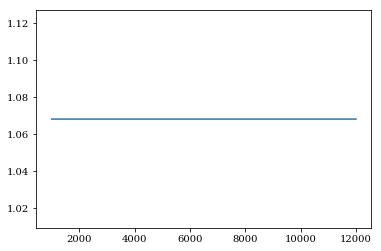

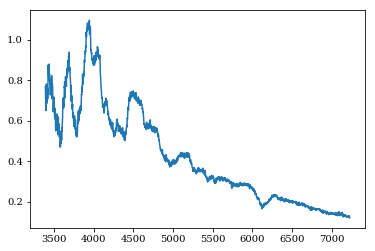

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


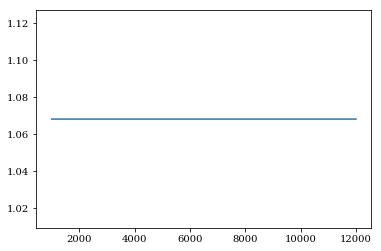

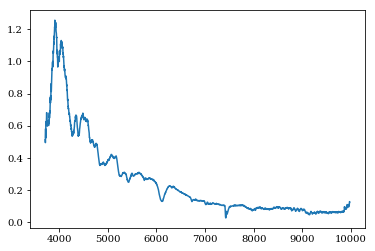

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


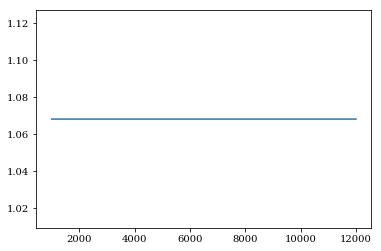

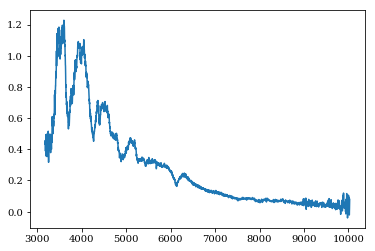

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


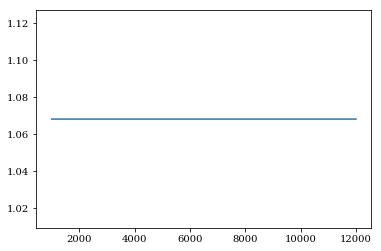

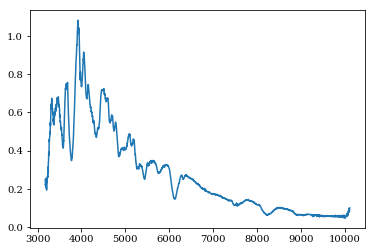

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


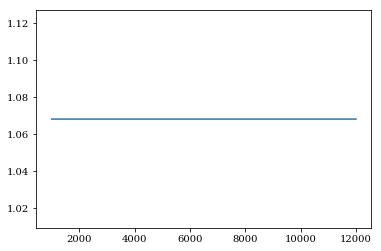

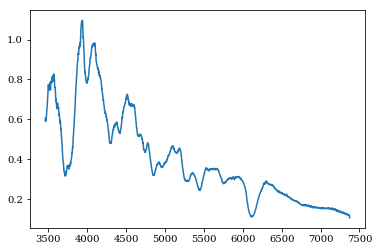

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


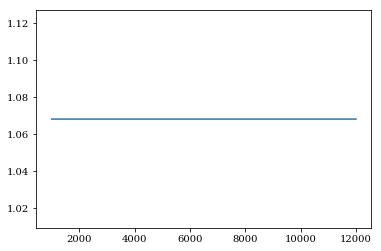

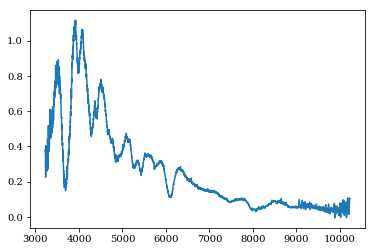

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


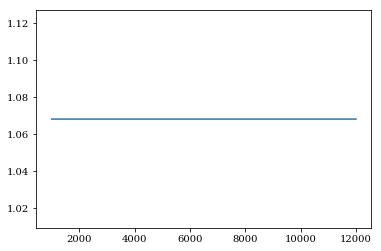

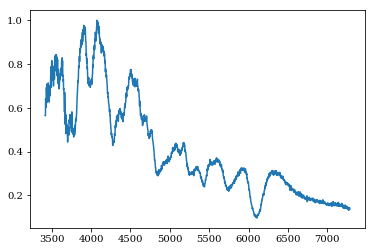

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


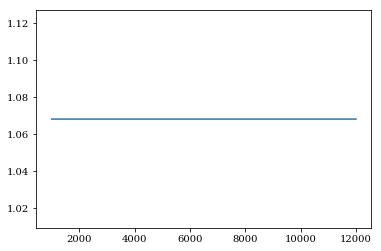

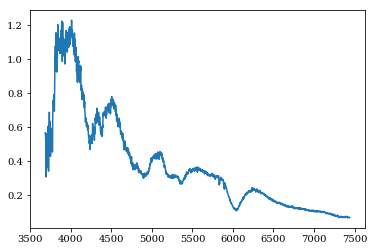

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


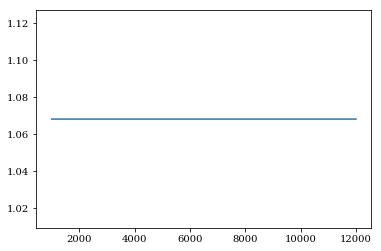

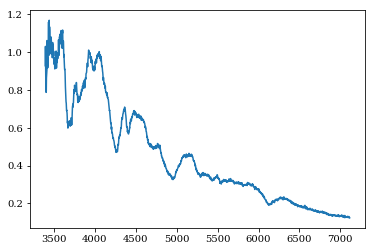

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


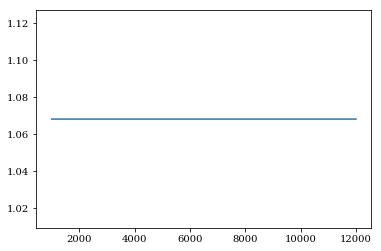

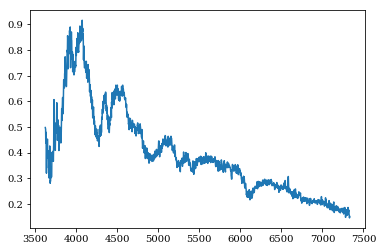

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


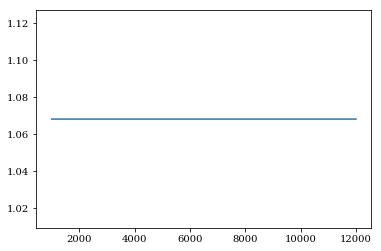

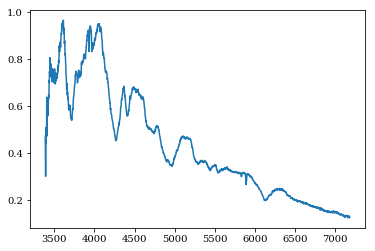

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


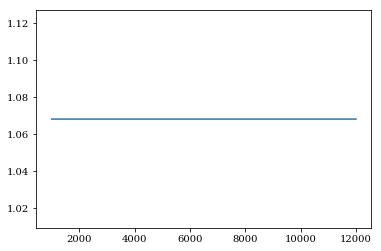

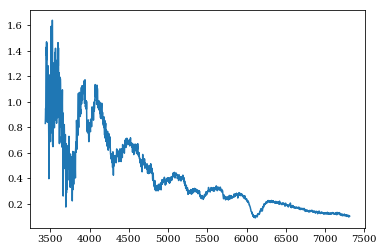

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


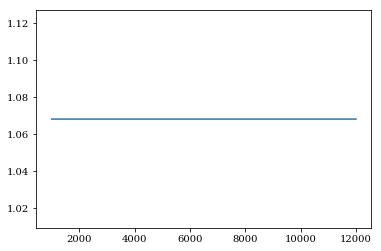

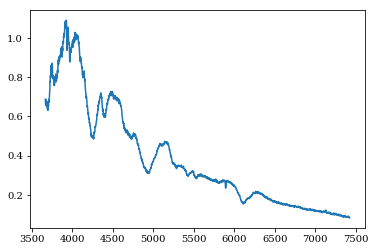

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


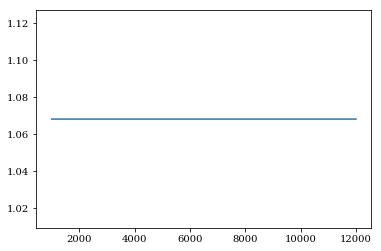

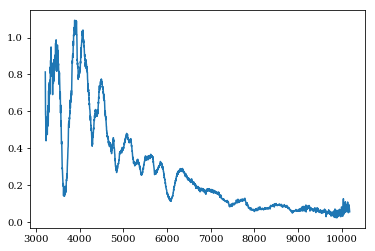

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


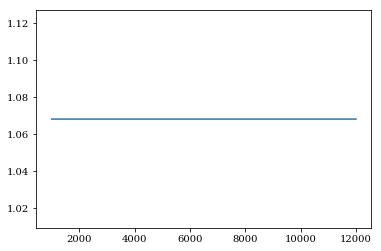

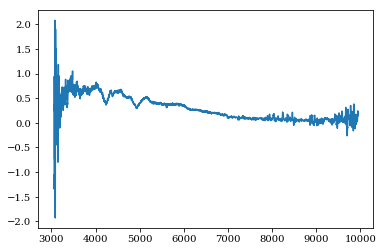

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


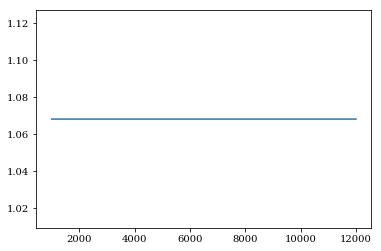

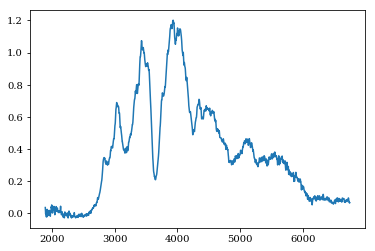

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


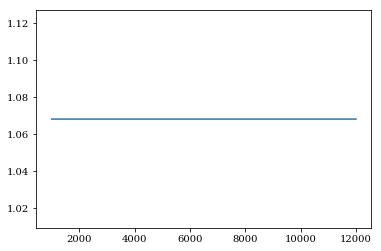

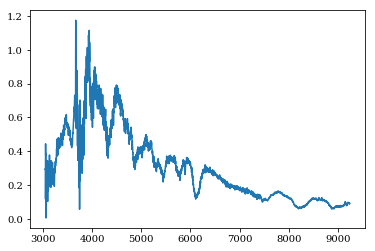

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


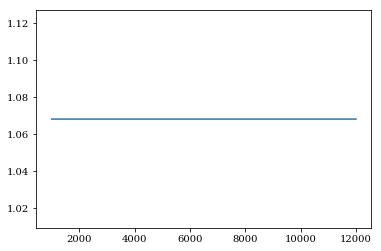

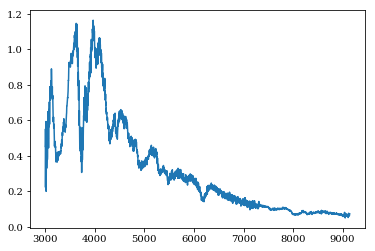

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


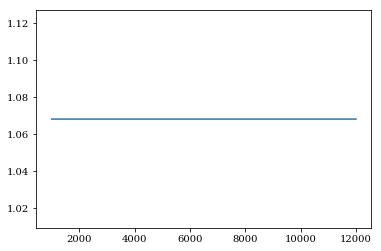

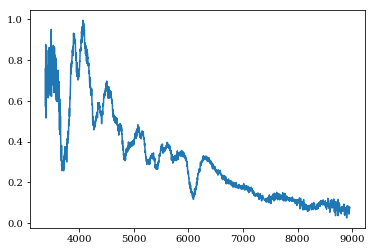

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


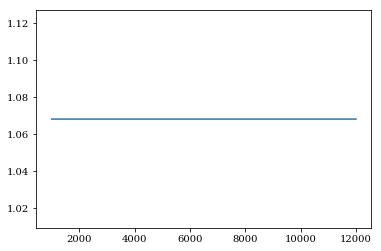

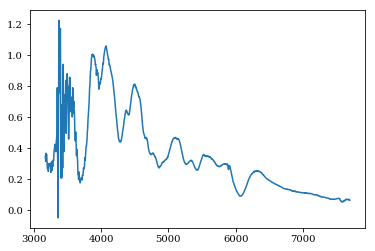

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


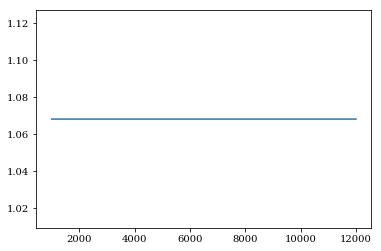

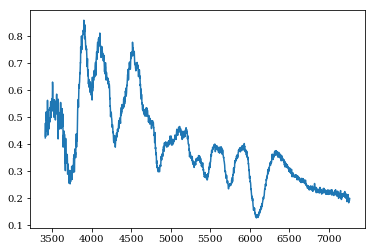

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


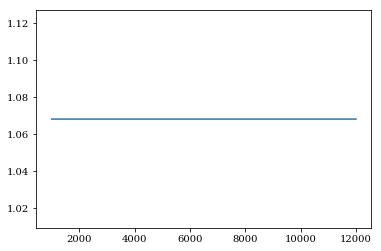

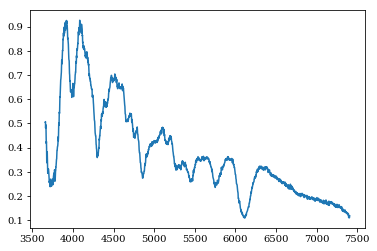

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


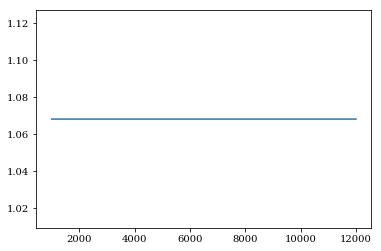

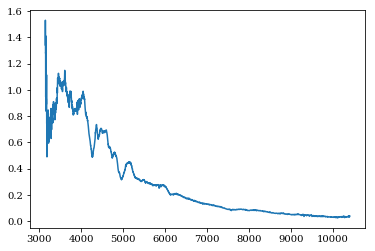

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


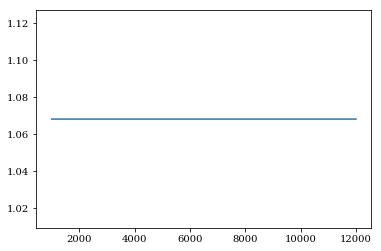

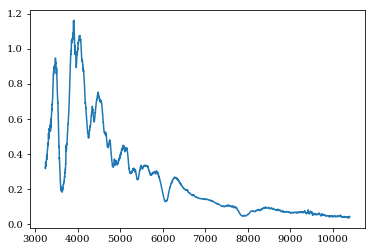

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


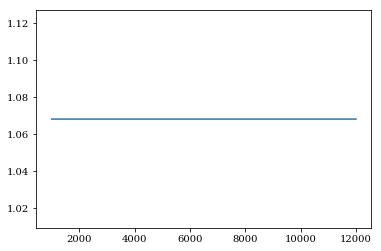

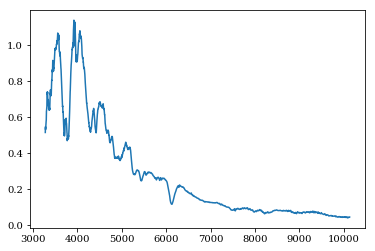

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


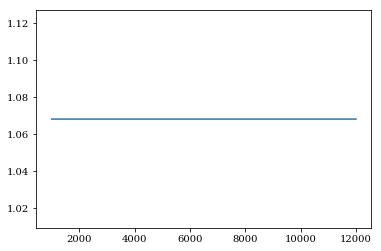

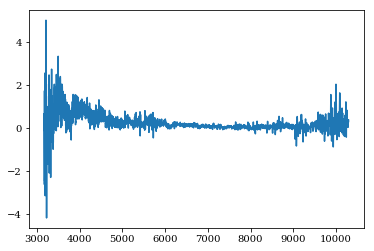

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


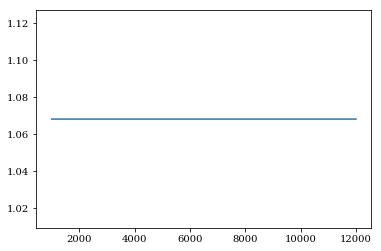

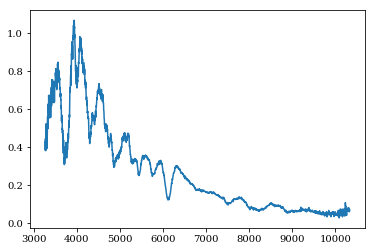

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


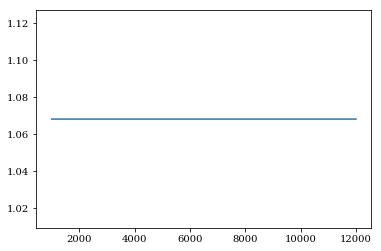

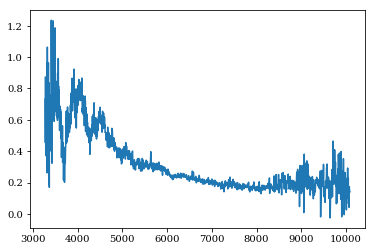

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


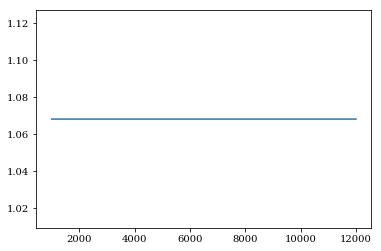

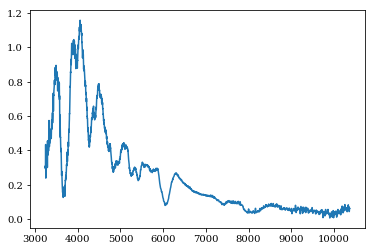

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


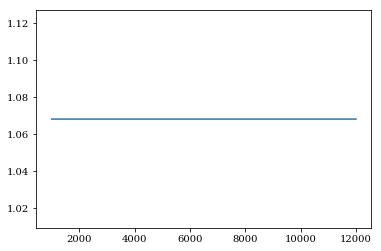

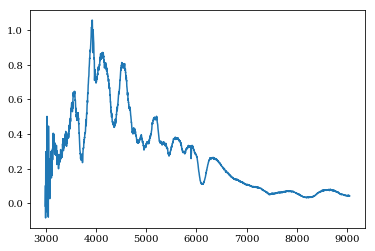

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


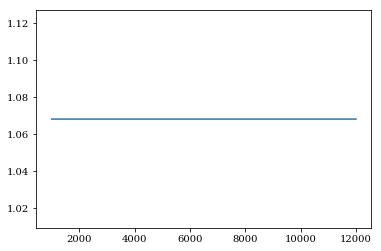

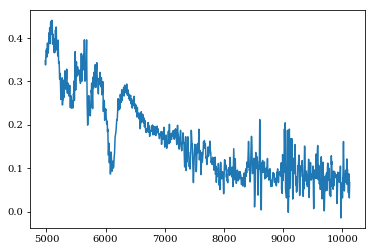

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


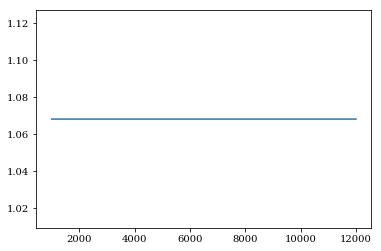

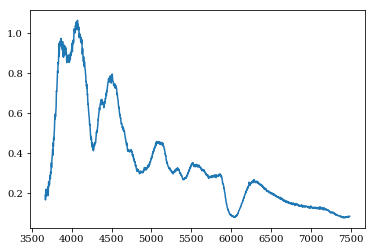

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


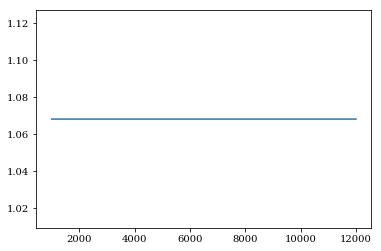

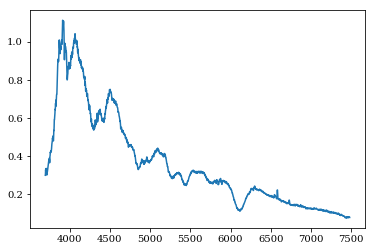

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


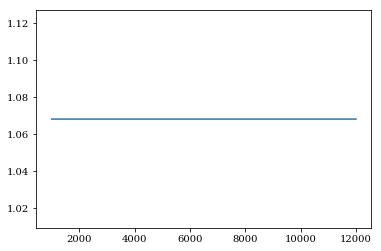

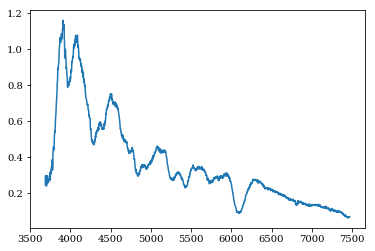

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


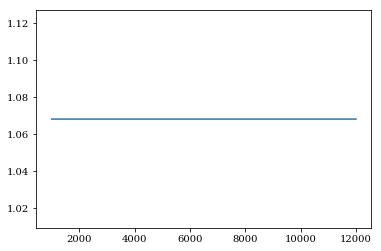

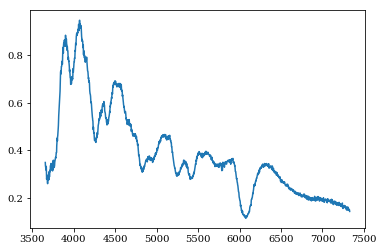

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


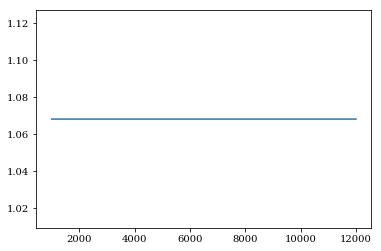

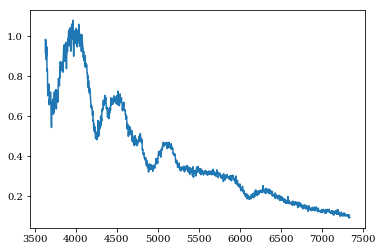

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


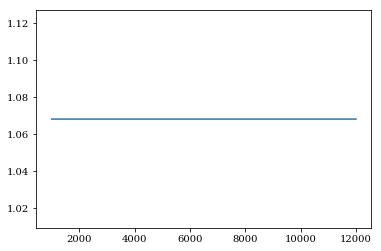

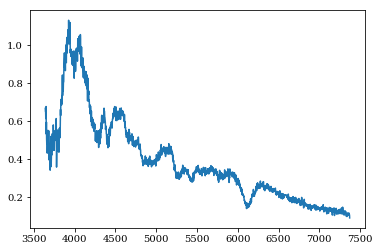

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


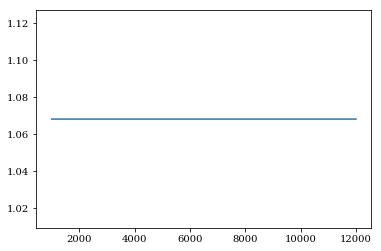

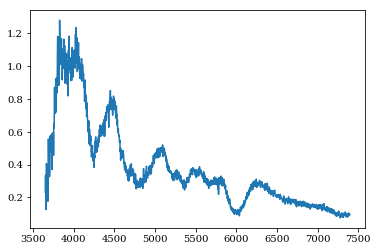

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


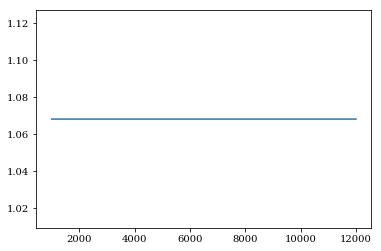

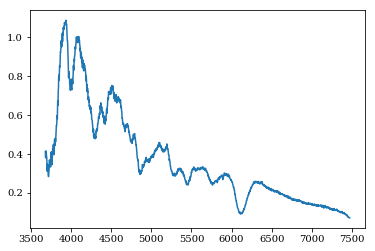

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


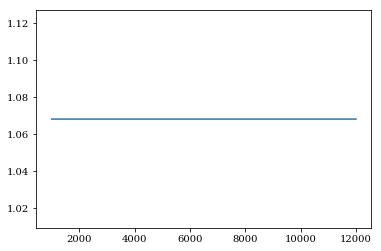

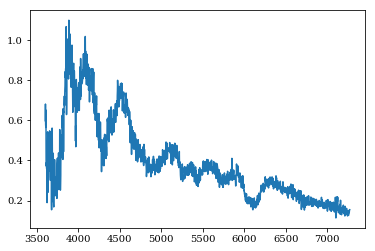

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


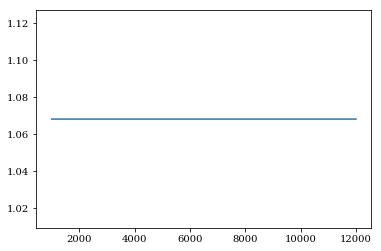

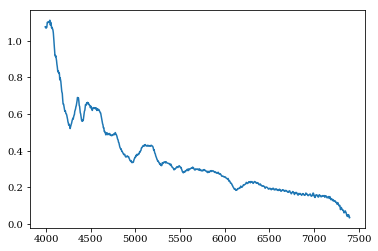

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


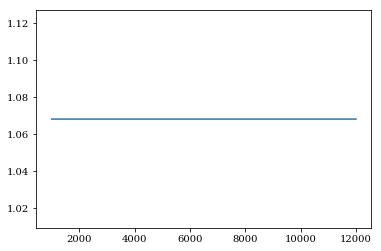

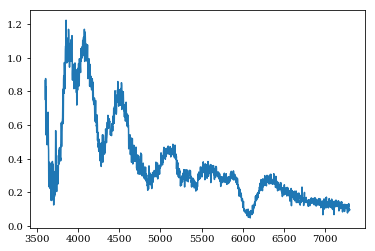

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


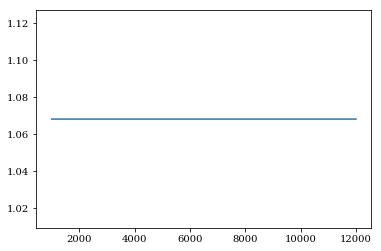

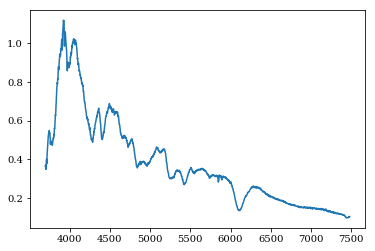

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


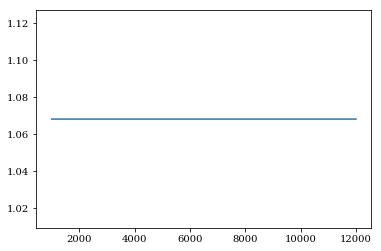

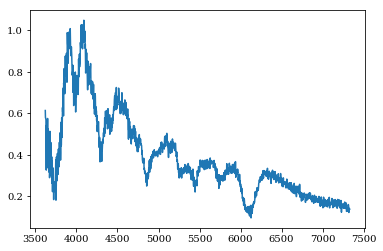

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


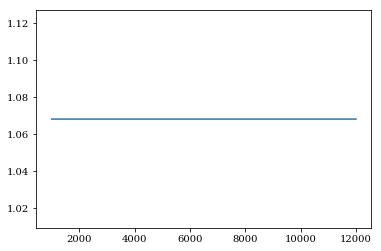

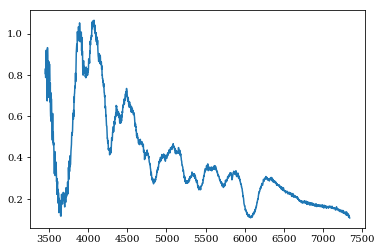

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


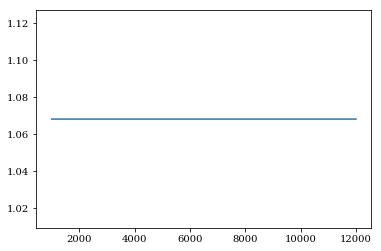

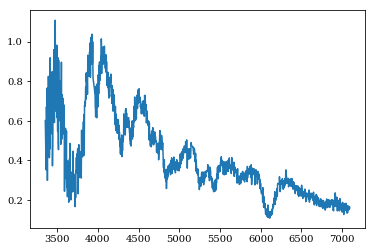

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


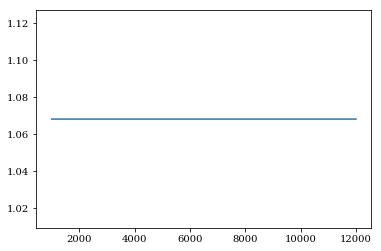

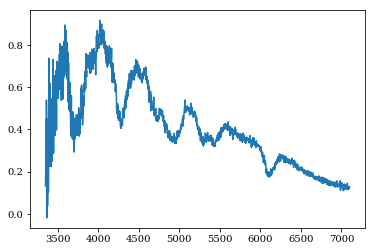

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


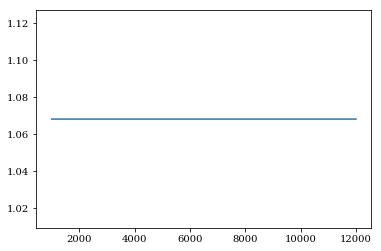

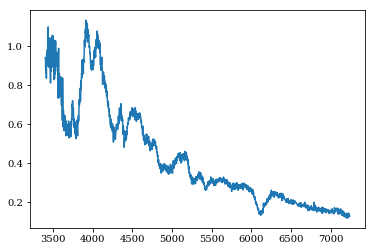

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


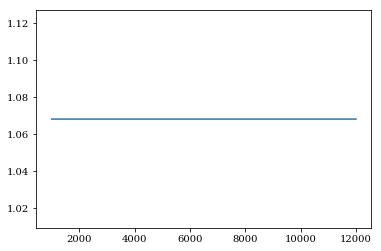

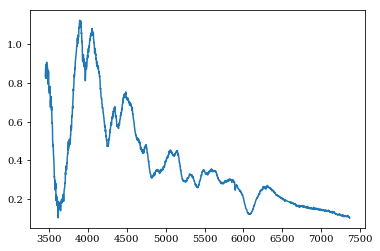

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


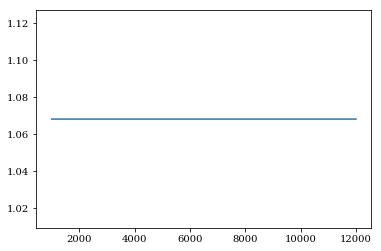

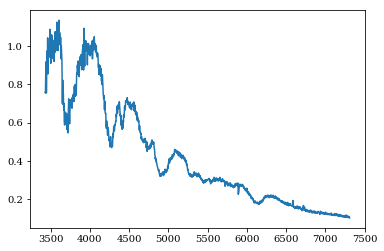

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


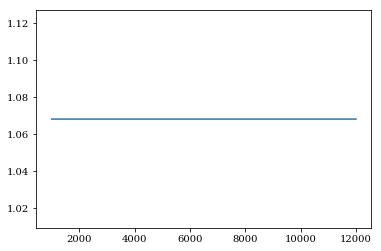

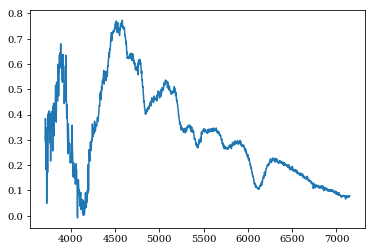

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


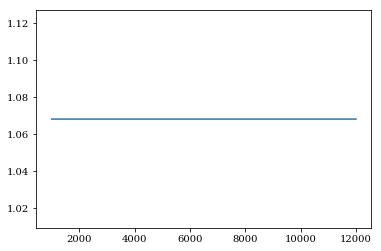

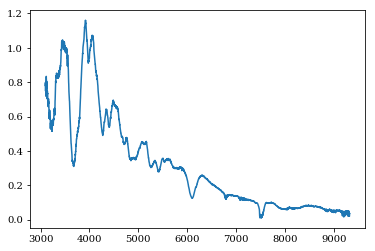

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


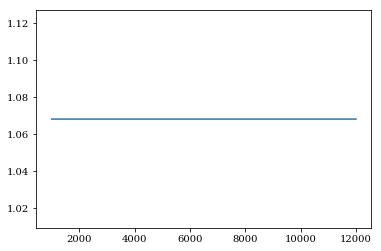

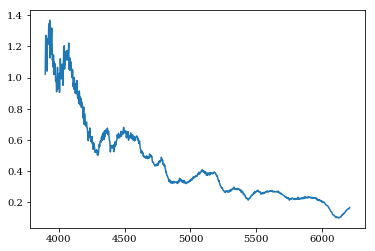

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


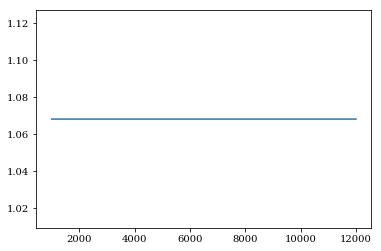

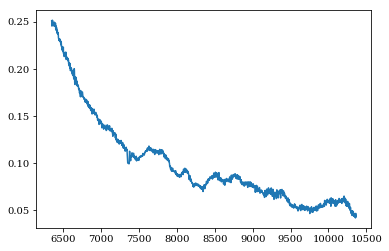

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


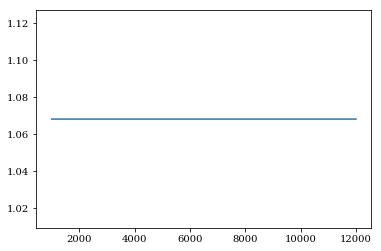

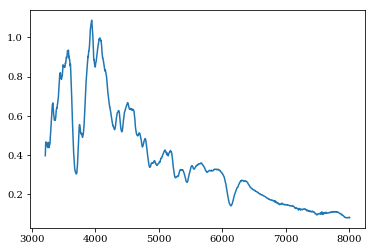

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


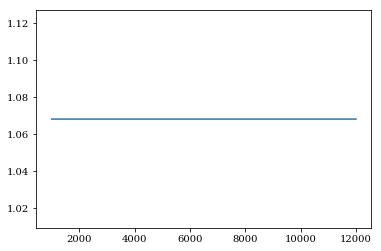

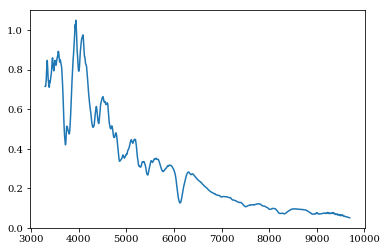

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


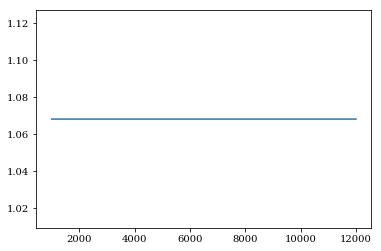

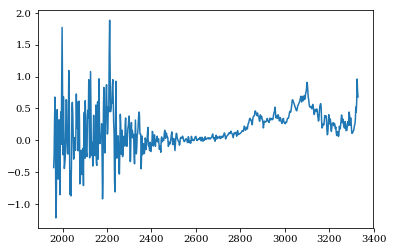

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


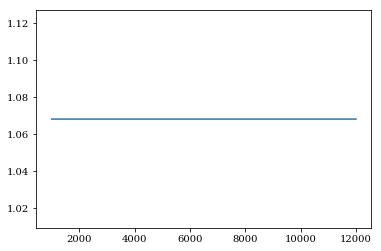

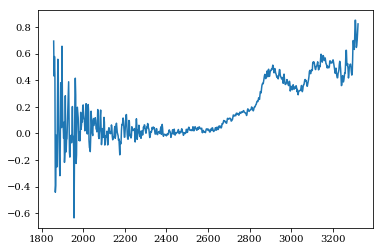

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


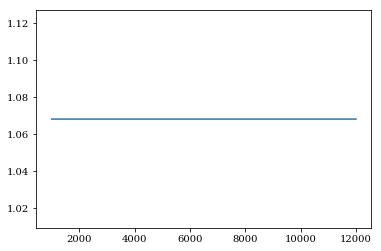

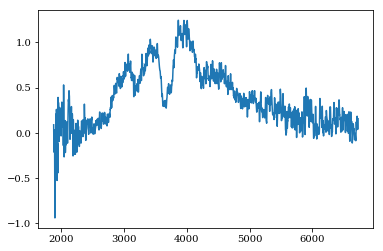

[1.06808154 1.06808154 1.06808154 ... 1.06808154 1.06808154 1.06808154]


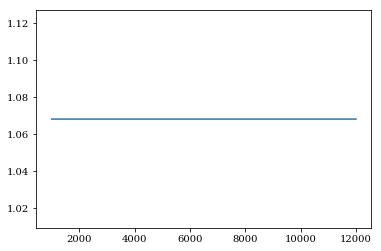

In [143]:
for sn in sn_arrays[0]:
    plt.plot(sn.wavelength, sn.flux)
    plt.show()
    print sn.ivar
    plt.plot(sn.wavelength, sn.ivar)
    plt.show()

1858.0 10526.0
1.25


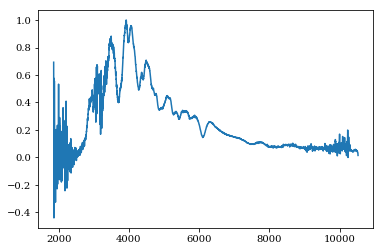

In [139]:
for comp in composites:
    print comp.wavelength[comp.x1],comp.wavelength[comp.x2]
    print 1.25*np.nanmax(comp.flux[comp.x1:comp.x2])
    plt.plot(comp.wavelength,comp.flux)
#     print spec.name, spec.filename, spec.redshift
#     plt.plot(spec.wavelength,spec.flux)
    plt.show()
    
# for spec in sn_arrays[0]:
#     print len(spec.flux)
#     plt.plot(spec.flux[~np.isnan(spec.flux)])
# #     print spec.name, spec.filename, spec.redshift
# #     plt.plot(spec.wavelength,spec.flux)
#     plt.show()

In [140]:
# plt.figure(figsize = [15,8])
# for b in boot_sn_arrays[0]:
#     plt.plot(b.wavelength, b.flux, 'g')
# plt.plot(composites[0].wavelength, composites[0].flux, 'k')
# plt.show()

Phase:  nan
dm15:  nan
Redshift:  0.0184133177655386
HR:  nan


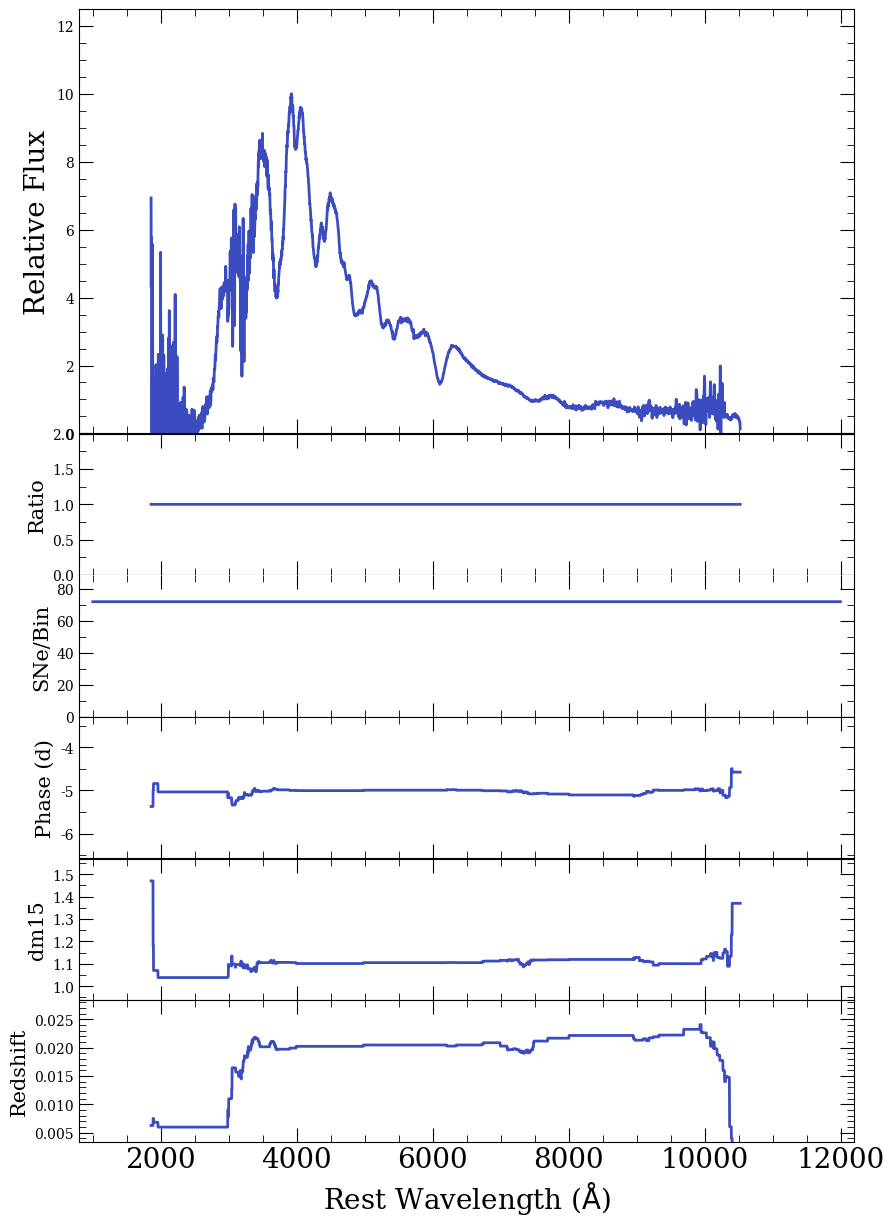

In [141]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

2011fe_combined


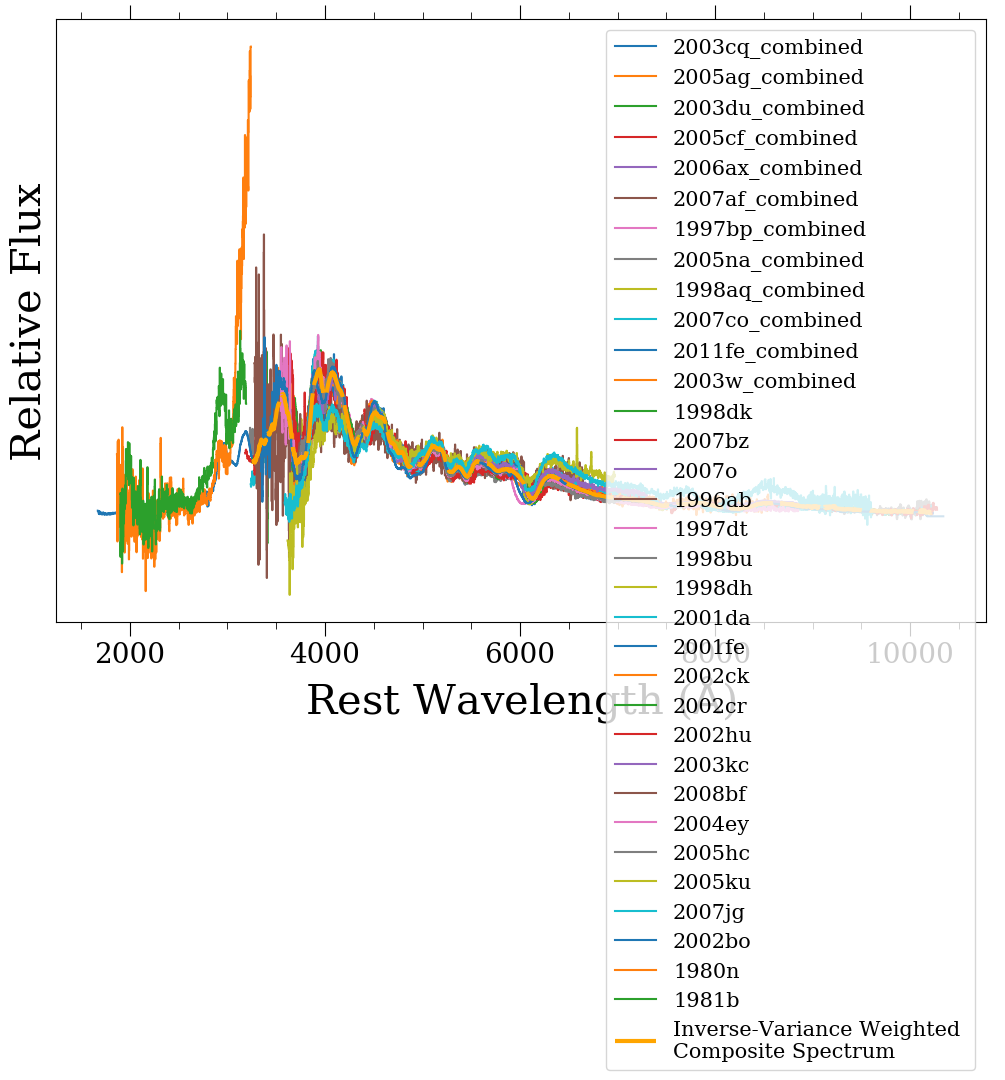

In [39]:
kplot.plot_comp_and_all_spectra(composites[0], sn_arrays[0],show_ivar=False, dm15=True)